In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [2]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

In [3]:
team_v_team_stats_df = Local.get_team_v_team_stats_dataframe('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [4]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [5]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [6]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [7]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [8]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [9]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [10]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [11]:
games_df

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
16157    2003-10-05  10300001    1610612762       1610612742    2003   
16156    2003-10-06  10300002    1610612763       1610612749    2003   
16155    2003-10-07  10300009    1610612758       1610612746    2003   
16154    2003-10-07  10300005    1610612757       1610612745    2003   
16153    2003-10-07  10300007    1610612748       1610612755    2003   
...             ...       ...           ...              ...     ...   
4        2020-12-18  12000040    1610612761       1610612748    2020   
3        2020-12-18  12000039    1610612754       1610612755    2020   
2        2020-12-19  12000049    1610612763       1610612737    2020   
1        2020-12-19  12000048    1610612764       1610612765    2020   
0        2020-12-19  12000047    1610612753       1610612766    2020   

       PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  REB_home  \
16157      90.0        0.457        0.735         0.143      23.0      41.0   
16156     105.0        0.494        0.618         0.267      25.0      48.0   
16155     101.0        0.467        0.871         0.444      19.0      39.0   
16154     104.0        0.527        0.657         0.429      22.0      33.0   
16153      86.0        0.352        0.647         0.222      15.0      55.0   
...         ...          ...          ...           ...       ...       ...   
4         105.0        0.380        0.737         0.356      27.0      37.0   
3         107.0        0.371        0.692         0.262      19.0      45.0   
2         116.0        0.400        0.744         0.396      21.0      43.0   
1          99.0        0.427        0.625         0.295      24.0      45.0   
0         120.0        0.433        0.792         0.425      23.0      50.0   

       PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  
16157      85.0        0.447        0.500         0.250      20.0      38.0  
16156      94.0        0.427        0.700         0.154      20.0      43.0  
16155      82.0        0.368        0.609         0.364      13.0      50.0  
16154      80.0        0.470        0.667         0.333      10.0      37.0  
16153      79.0        0.329        0.897         0.143       7.0      44.0  
...         ...          ...          ...           ...       ...       ...  
4         117.0        0.534        0.741         0.514      30.0      51.0  
3         113.0        0.533        0.629         0.355      23.0      48.0  
2         117.0        0.422        0.837         0.297      24.0      47.0  
1          96.0        0.402        0.647         0.326      18.0      51.0  
0         117.0        0.444        0.864         0.439      21.0      52.0  

[23520 rows x 17 columns]

In [12]:
cumulative_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23515  2020-12-18  12000040            1    2020                  2   
23516  2020-12-18  12000039            1    2020                  2   
23517  2020-12-19  12000049            1    2020                  3   
23518  2020-12-19  12000048            1    2020                  2   
23519  2020-12-19  12000047            1    2020                  3   

       GAMES_PLAYED_away  PPG_total_home  FG_PCT_total_home  \
0                      0        0.000000           0.000000   
1                      0        0.000000           0.000000   
2                      0        0.000000           0.000000   
3                      0        0.000000           0.000000   
4                      0        0.000000           0.000000   
...                  ...             ...                ...   
23515                  1      111.500000           0.443500   
23516                  1      105.000000           0.438000   
23517                  3      119.333333           0.466667   
23518                  3      100.000000           0.415000   
23519                  3      112.666667           0.444333   

       FG3_PCT_total_home  FT_PCT_total_home  ...  PPG_total_away  \
0                0.000000           0.000000  ...        0.000000   
1                0.000000           0.000000  ...        0.000000   
2                0.000000           0.000000  ...        0.000000   
3                0.000000           0.000000  ...        0.000000   
4                0.000000           0.000000  ...        0.000000   
...                   ...                ...  ...             ...   
23515            0.353000           0.691000  ...       92.000000   
23516            0.383000           0.619000  ...      108.000000   
23517            0.329333           0.704667  ...      111.333333   
23518            0.321500           0.704500  ...       93.333333   
23519            0.305333           0.758000  ...      110.666667   

       FG_PCT_total_away  FG3_PCT_total_away  FT_PCT_total_away  \
0               0.000000            0.000000           0.000000   
1               0.000000            0.000000           0.000000   
2               0.000000            0.000000           0.000000   
3               0.000000            0.000000           0.000000   
4               0.000000            0.000000           0.000000   
...                  ...                 ...                ...   
23515           0.427000            0.283000           0.818000   
23516           0.471000            0.241000           0.750000   
23517           0.392667            0.332333           0.789667   
23518           0.413333            0.333000           0.713000   
23519           0.442333            0.372333           0.751000   

       APG_total_away  RPG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  \
0            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
1            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
2            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
3            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
4            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
...               ...             ...           ...           ...         ...   
23515       26.000000       35.000000  1.610613e+09  1.610613e+09    0.000000   
23516       23.000000       42.000000  1.610613e+09  1.610613e+09    1.000000   
23517       24.000000       56.000000  1

In [13]:
team_v_team_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23511  2020-12-18  12000044            1    2020                  1   
23516  2020-12-18  12000039            1    2020                  0   
23518  2020-12-19  12000048            1    2020                  1   
23517  2020-12-19  12000049            1    2020                  1   
23519  2020-12-19  12000047            1    2020                  1   

       GAMES_PLAYED_away  FG3_PCT_total_home  PPG_total_home  \
0                      0               0.000             0.0   
1                      0               0.000             0.0   
2                      0               0.000             0.0   
3                      0               0.000             0.0   
4                      0               0.000             0.0   
...                  ...                 ...             ...   
23511                  1               0.324           103.0   
23516                  0               0.000             0.0   
23518                  1               0.265            86.0   
23517                  1               0.380           128.0   
23519                  1               0.324           115.0   

       FG_PCT_total_home  RPG_total_home  ...  FG3_PCT_total_away  \
0                  0.000             0.0  ...               0.000   
1                  0.000             0.0  ...               0.000   
2                  0.000             0.0  ...               0.000   
3                  0.000             0.0  ...               0.000   
4                  0.000             0.0  ...               0.000   
...                  ...             ...  ...                 ...   
23511              0.381            46.0  ...               0.333   
23516              0.000             0.0  ...               0.000   
23518              0.397            42.0  ...               0.400   
23517              0.474            58.0  ...               0.289   
23519              0.474            53.0  ...               0.439   

       PPG_total_away  FG_PCT_total_away  RPG_total_away  FT_PCT_total_away  \
0                 0.0              0.000             0.0              0.000   
1                 0.0              0.000             0.0              0.000   
2                 0.0              0.000             0.0              0.000   
3                 0.0              0.000             0.0              0.000   
4                 0.0              0.000             0.0              0.000   
...               ...                ...             ...                ...   
23511           124.0              0.542            61.0              0.643   
23516             0.0              0.000             0.0              0.000   
23518            97.0              0.494            42.0              0.583   
23517           106.0              0.381            46.0              0.864   
23519           123.0              0.475            43.0              0.900   

       APG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  W_PCT_home  
0                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
1                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
2                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
3                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
4                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
...               ...           ...           ...         ...         ...  
23511            26.0  1.610613e+09  1.610613e+09         1.0         0.0  
23516

## Attach target columns to dataset

In [14]:
team_v_team_stats_copy_df = team_v_team_stats_df.copy()
team_v_team_stats_copy_df['home_win'] = winners_df
team_v_team_stats_copy_df['greater_fgp'] = greater_fgp_df
team_v_team_stats_copy_df['greater_fg3'] = greater_fg3_df
team_v_team_stats_copy_df['greater_ft'] = greater_ft_df
team_v_team_stats_copy_df['greater_ast'] = greater_ast_df
team_v_team_stats_copy_df['greater_reb'] = greater_reb_df

## Remove rows w/o data

In [15]:
team_v_team_stats_copy_df = team_v_team_stats_copy_df[(team_v_team_stats_copy_df['GAMES_PLAYED_home']>0) & (team_v_team_stats_copy_df['GAMES_PLAYED_away']>0)]

# Get new target datasets after row removal
winners_df = team_v_team_stats_copy_df['home_win']
greater_fgp_df = team_v_team_stats_copy_df['greater_fgp']
greater_fg3_df = team_v_team_stats_copy_df['greater_fg3']
greater_ft_df = team_v_team_stats_copy_df['greater_ft']
greater_ast_df = team_v_team_stats_copy_df['greater_ast']
greater_reb_df = team_v_team_stats_copy_df['greater_reb']

## Remove non-data

In [16]:
# Delete non-data
for key in [
    'DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away',
    'home_win','greater_fgp','greater_fg3','greater_ft','greater_ast','greater_reb'
]:
    del team_v_team_stats_copy_df[key]

team_v_team_stats_copy_df

FG3_PCT_total_home  PPG_total_home  FG_PCT_total_home  RPG_total_home  \
26                  0.211            78.0              0.329            38.0   
49                  0.000            98.0              0.500            37.0   
44                  0.667            58.0              0.457            31.0   
53                  0.286           104.0              0.493            40.0   
87                  0.250            85.0              0.447            38.0   
...                   ...             ...                ...             ...   
23509               0.310           107.0              0.407            45.0   
23511               0.324           103.0              0.381            46.0   
23518               0.265            86.0              0.397            42.0   
23517               0.380           128.0              0.474            58.0   
23519               0.324           115.0              0.474            53.0   

       FT_PCT_total_home  APG_total_home  FG3_PCT_total_away  PPG_total_away  \
26                 0.737             8.0               0.370            98.0   
49                 0.800            17.0               0.700           105.0   
44                 0.700            10.0               0.300            62.0   
53                 0.700            22.0               0.214            89.0   
87                 0.500            20.0               0.143            90.0   
...                  ...             ...                 ...             ...   
23509              0.800            26.0               0.400           112.0   
23511              0.680            22.0               0.333           124.0   
23518              0.682            18.0               0.400            97.0   
23517              0.773            33.0               0.289           106.0   
23519              0.917            26.0               0.439           123.0   

       FG_PCT_total_away  RPG_total_away  FT_PCT_total_away  APG_total_away  \
26                 0.413            42.0              0.703            22.0   
49                 0.527            39.0              0.714            27.0   
44                 0.385            30.0              0.576            11.0   
53                 0.462            36.0              0.538            21.0   
87                 0.457            41.0              0.735            23.0   
...                  ...             ...                ...             ...   
23509              0.476            47.0              0.750            20.0   
23511              0.542            61.0              0.643            26.0   
23518              0.494            42.0              0.583            20.0   
23517              0.381            46.0              0.864            25.0   
23519              0.475            43.0              0.900            32.0   

       W_PCT_away  W_PCT_home  
26            1.0         0.0  
49            1.0         0.0  
44            1.0         0.0  
53            0.0         1.0  
87            1.0         0.0  
...           ...         ...  
23509         1.0         0.0  
23511         1.0         0.0  
23518         1.0         0.0  
23517         0.0         1.0  
23519         1.0         0.0  

[16034 rows x 14 columns]

## Do hyperparameters searches

In [17]:
from sklearn.metrics import classification_report

In [18]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [19]:
from sklearn.utils.class_weight import compute_sample_weight

In [20]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
#     clf.fit(x, y, sample_weight=compute_sample_weight('balanced',y))
    clf.fit(x, y)
    return clf

## Plot feature importances

In [21]:
def plot_feature_importances(clf, X, y):
    viz = FeatureImportances(clf, labels=X.columns)
    viz.fit(X, y)
    viz.show()

In [22]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, y_train_dict, y_test_dict, grid_cv_params):
    scores = []
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
#             GridSearchCV,
            RandomizedSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        score = cv_clf.best_estimator_.score(X_test_dict[key], y_test_dict[key])
        scores.append(score)
        print('Best Random Forest accuracy (%s): %.2f' % (str(cv_clf.best_params_), score))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_, X_train_dict[key], y_train_dict[key])
        print('---------------------------------------------')
    return scores

## Build K-folds datasets

In [23]:
from imblearn.combine import SMOTEENN

In [24]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=123)

X_train_dicts = []
X_test_dicts = []
y_train_dicts = []
y_test_dicts = []

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    X_over, y_over = SMOTEENN(sampling_strategy='all').fit_resample(team_v_team_stats_copy_df, target)
    for train, test in kf.split(X_over, y_over):
        X_train_dict = {}
        X_test_dict = {}
        y_train_dict = {}
        y_test_dict = {}
        
        X_train_dict[key], X_test_dict[key] = X_over.iloc[train], X_over.iloc[test]
        y_train_dict[key], y_test_dict[key] = y_over.iloc[train], y_over.iloc[test]
        
        X_train_dicts.append(X_train_dict)
        X_test_dicts.append(X_test_dict)
        y_train_dicts.append(y_train_dict)
        y_test_dicts.append(y_test_dict)

assert len(X_train_dicts)==len(X_test_dicts)==len(y_train_dicts)==len(y_test_dicts)
print(len(X_train_dicts))

30


In [25]:
def print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, params):
    scores=[]
    for i in range(len(X_train_dicts)):
        print(f'i={i}')
        score = print_all_metrics_and_plot(
            RandomForestClassifier(random_state=0),
            X_train_dicts[i],
            X_test_dicts[i],
            y_train_dicts[i],
            y_test_dicts[i],
            params,
        )
        if (i+1)%5==0:
            scores = pd.DataFrame(np.array(scores))
            print(f'Mean accuracy: {scores.mean()[0]}')
            print(f'Max accuracy: {scores.max()[0]}')
            print(f'Min accuracy: {scores.min()[0]}')
            print('=========================================')
            scores=[]
        else:
            scores += score

## Train Random Forest Without Pruning

i=0


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.72
              precision    recall  f1-score   support

           0       0.71      0.95      0.82       639
           1       0.77      0.29      0.42       342

    accuracy                           0.72       981
   macro avg       0.74      0.62      0.62       981
weighted avg       0.73      0.72      0.68       981



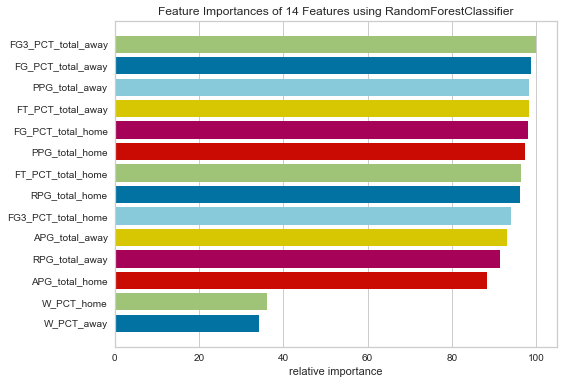

---------------------------------------------
i=1


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.71      0.93      0.80       646
           1       0.65      0.26      0.37       335

    accuracy                           0.70       981
   macro avg       0.68      0.59      0.59       981
weighted avg       0.69      0.70      0.65       981



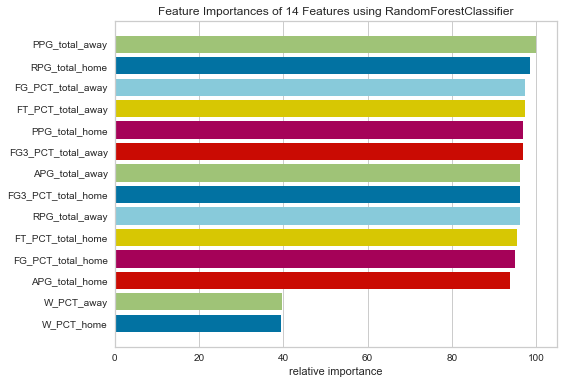

---------------------------------------------
i=2


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.69
              precision    recall  f1-score   support

           0       0.68      0.92      0.79       612
           1       0.69      0.29      0.41       368

    accuracy                           0.69       980
   macro avg       0.69      0.61      0.60       980
weighted avg       0.69      0.69      0.64       980



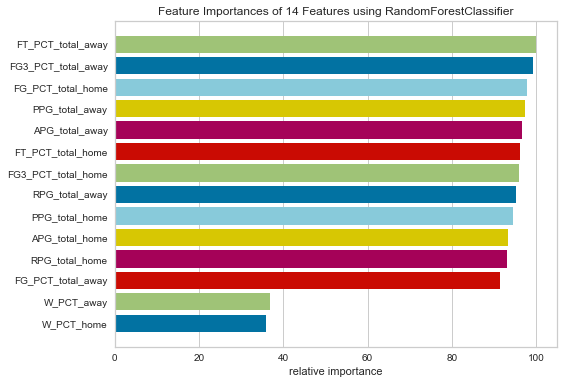

---------------------------------------------
i=3


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.73
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       646
           1       0.74      0.31      0.44       334

    accuracy                           0.73       980
   macro avg       0.73      0.63      0.63       980
weighted avg       0.73      0.73      0.69       980



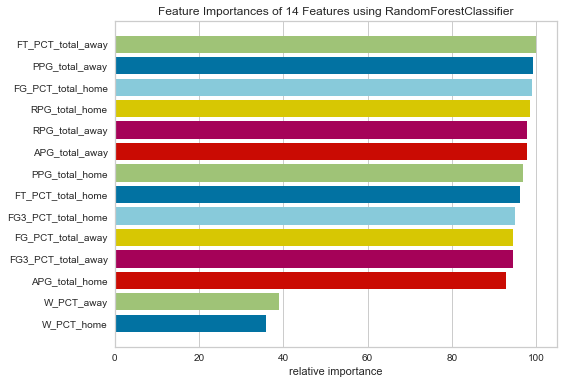

---------------------------------------------
i=4


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.69
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       615
           1       0.70      0.29      0.41       365

    accuracy                           0.69       980
   macro avg       0.70      0.61      0.60       980
weighted avg       0.69      0.69      0.65       980



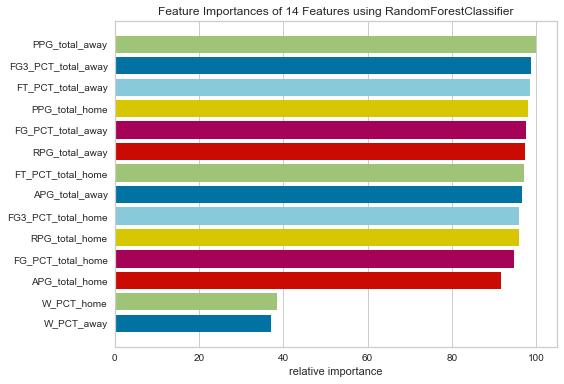

---------------------------------------------
Mean accuracy: 0.7085663317314694
Max accuracy: 0.7285714285714285
Min accuracy: 0.6857142857142857
i=5


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       422
           1       0.67      0.31      0.42       281

    accuracy                           0.66       703
   macro avg       0.67      0.61      0.59       703
weighted avg       0.67      0.66      0.63       703



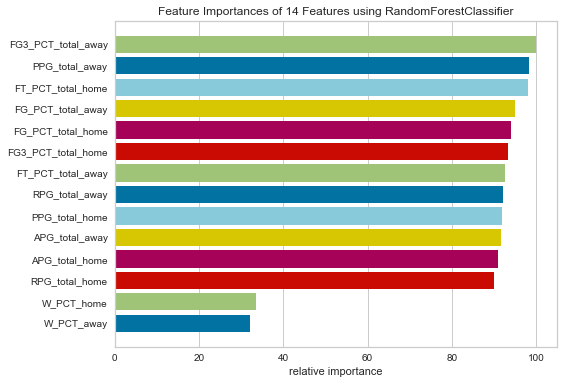

---------------------------------------------
i=6


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       431
           1       0.61      0.37      0.46       272

    accuracy                           0.66       703
   macro avg       0.64      0.61      0.61       703
weighted avg       0.65      0.66      0.64       703



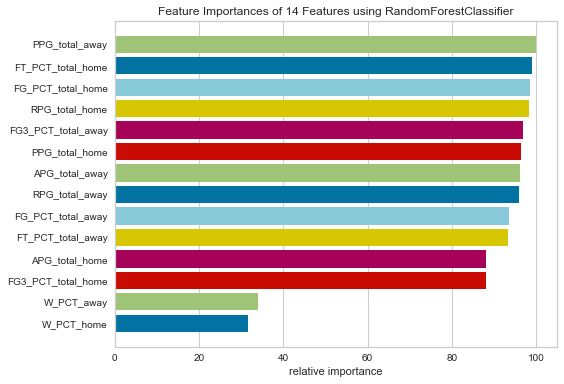

---------------------------------------------
i=7


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.89      0.76       424
           1       0.66      0.33      0.44       279

    accuracy                           0.67       703
   macro avg       0.66      0.61      0.60       703
weighted avg       0.66      0.67      0.63       703



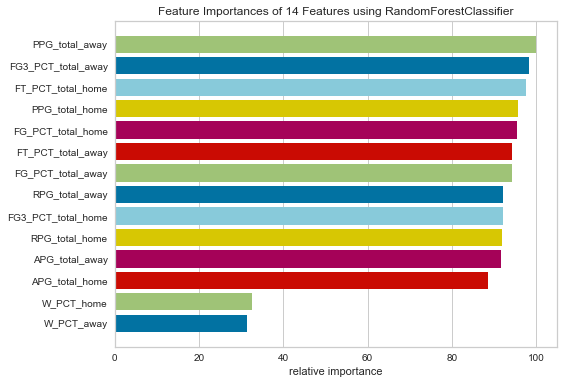

---------------------------------------------
i=8


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.89      0.77       443
           1       0.60      0.28      0.39       260

    accuracy                           0.66       703
   macro avg       0.64      0.59      0.58       703
weighted avg       0.65      0.66      0.63       703



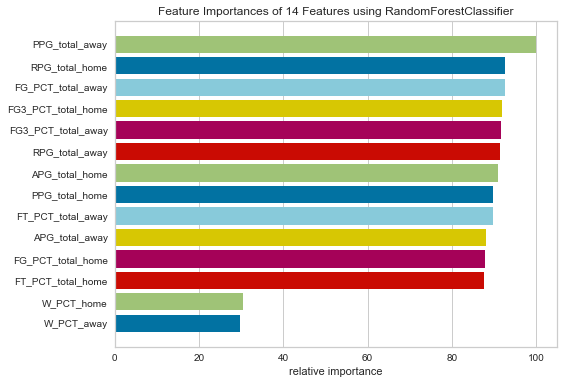

---------------------------------------------
i=9


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       417
           1       0.68      0.32      0.44       285

    accuracy                           0.66       702
   macro avg       0.67      0.61      0.60       702
weighted avg       0.67      0.66      0.63       702



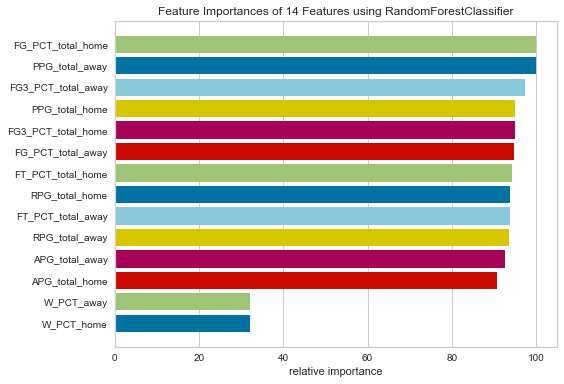

---------------------------------------------
Mean accuracy: 0.6646514935988621
Max accuracy: 0.6657183499288762
Min accuracy: 0.6642958748221907
i=10


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       233
           1       0.59      0.50      0.54       215

    accuracy                           0.60       448
   macro avg       0.60      0.59      0.59       448
weighted avg       0.60      0.60      0.59       448



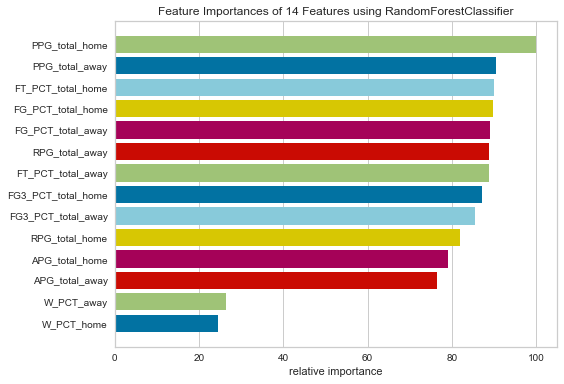

---------------------------------------------
i=11


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       239
           1       0.60      0.53      0.56       209

    accuracy                           0.62       448
   macro avg       0.61      0.61      0.61       448
weighted avg       0.61      0.62      0.61       448



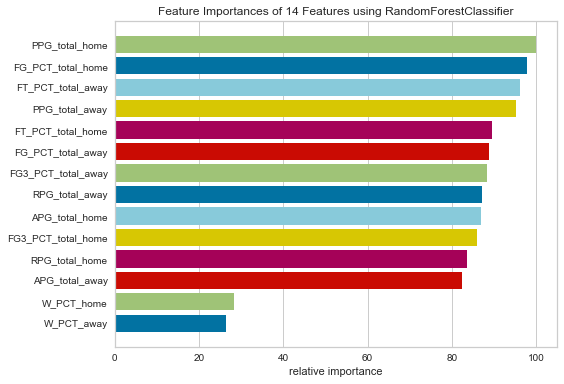

---------------------------------------------
i=12


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.58      0.70      0.63       234
           1       0.57      0.44      0.50       213

    accuracy                           0.57       447
   macro avg       0.57      0.57      0.56       447
weighted avg       0.57      0.57      0.57       447



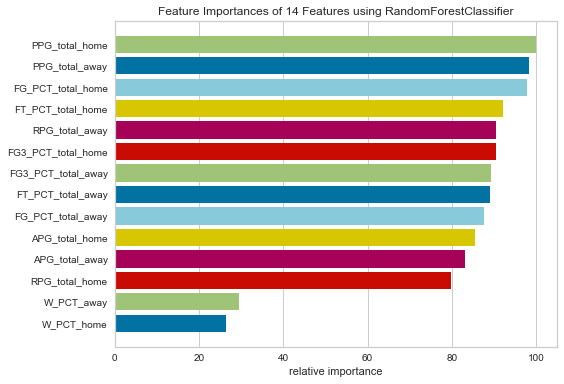

---------------------------------------------
i=13


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.70      0.65       230
           1       0.63      0.54      0.58       217

    accuracy                           0.62       447
   macro avg       0.62      0.62      0.62       447
weighted avg       0.62      0.62      0.62       447



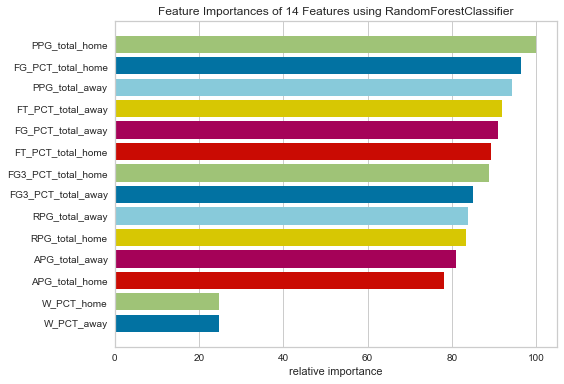

---------------------------------------------
i=14


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.68      0.63       228
           1       0.60      0.50      0.54       219

    accuracy                           0.59       447
   macro avg       0.59      0.59      0.59       447
weighted avg       0.59      0.59      0.59       447



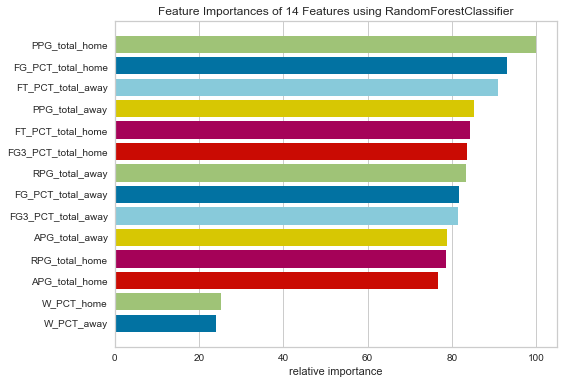

---------------------------------------------
Mean accuracy: 0.6022303950942793
Max accuracy: 0.6219239373601789
Min accuracy: 0.5749440715883669
i=15


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       215
           1       0.59      0.62      0.60       221

    accuracy                           0.59       436
   macro avg       0.59      0.59      0.59       436
weighted avg       0.59      0.59      0.59       436



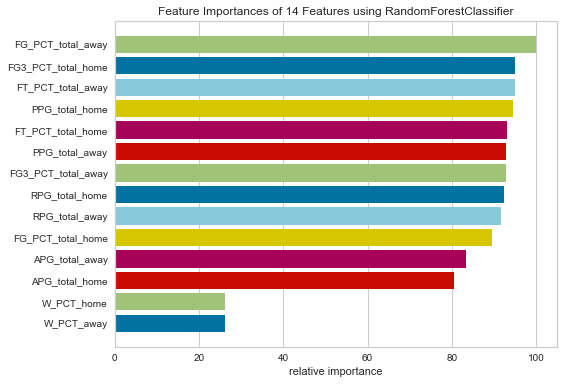

---------------------------------------------
i=16


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.56      0.58       216
           1       0.59      0.62      0.60       220

    accuracy                           0.59       436
   macro avg       0.59      0.59      0.59       436
weighted avg       0.59      0.59      0.59       436



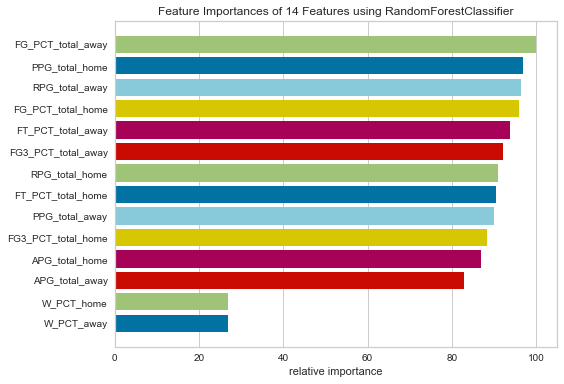

---------------------------------------------
i=17


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       209
           1       0.62      0.62      0.62       227

    accuracy                           0.60       436
   macro avg       0.60      0.60      0.60       436
weighted avg       0.60      0.60      0.60       436



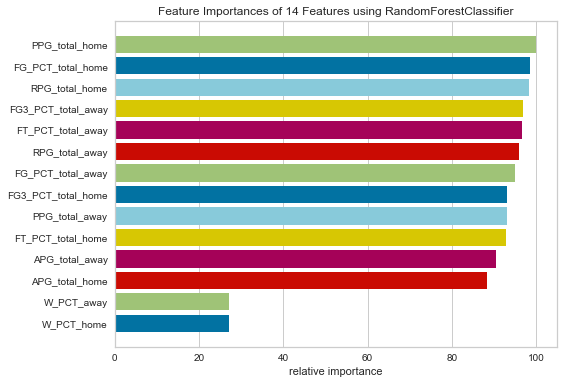

---------------------------------------------
i=18


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       208
           1       0.59      0.59      0.59       228

    accuracy                           0.57       436
   macro avg       0.57      0.57      0.57       436
weighted avg       0.57      0.57      0.57       436



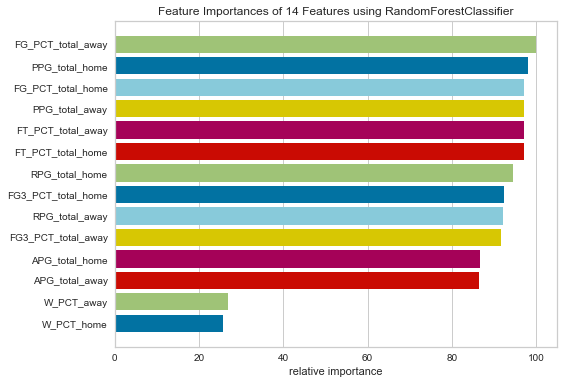

---------------------------------------------
i=19


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       217
           1       0.61      0.61      0.61       219

    accuracy                           0.61       436
   macro avg       0.61      0.61      0.61       436
weighted avg       0.61      0.61      0.61       436



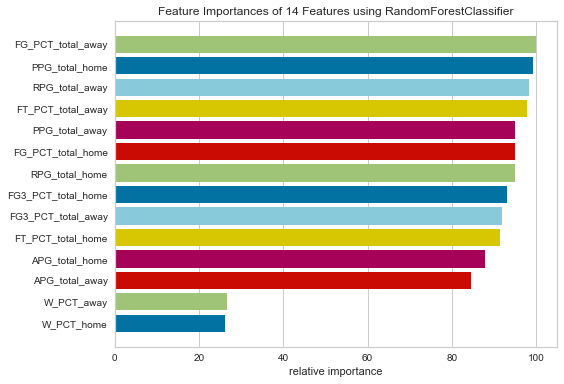

---------------------------------------------
Mean accuracy: 0.588302752293578
Max accuracy: 0.6009174311926605
Min accuracy: 0.5688073394495413
i=20


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.65      0.90      0.76       385
           1       0.72      0.34      0.46       282

    accuracy                           0.67       667
   macro avg       0.69      0.62      0.61       667
weighted avg       0.68      0.67      0.63       667



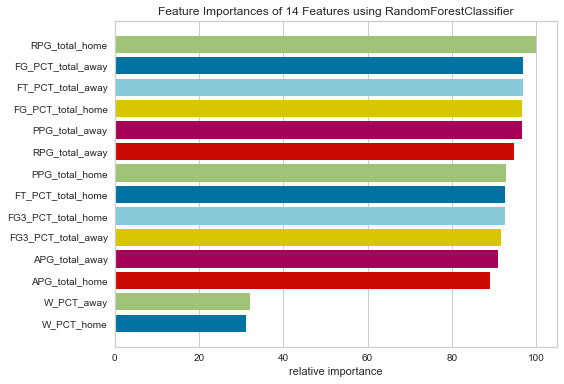

---------------------------------------------
i=21


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       396
           1       0.64      0.38      0.48       271

    accuracy                           0.66       667
   macro avg       0.65      0.62      0.61       667
weighted avg       0.66      0.66      0.64       667



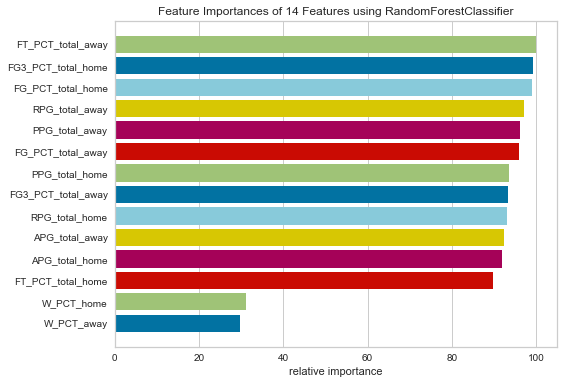

---------------------------------------------
i=22


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.73
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       412
           1       0.74      0.43      0.54       254

    accuracy                           0.73       666
   macro avg       0.73      0.67      0.67       666
weighted avg       0.73      0.73      0.70       666



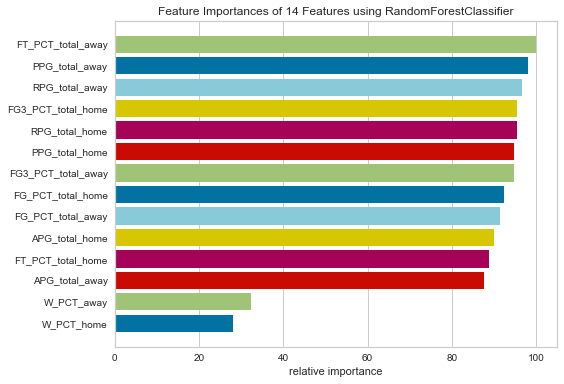

---------------------------------------------
i=23


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.69      0.86      0.77       413
           1       0.62      0.38      0.47       253

    accuracy                           0.68       666
   macro avg       0.66      0.62      0.62       666
weighted avg       0.67      0.68      0.66       666



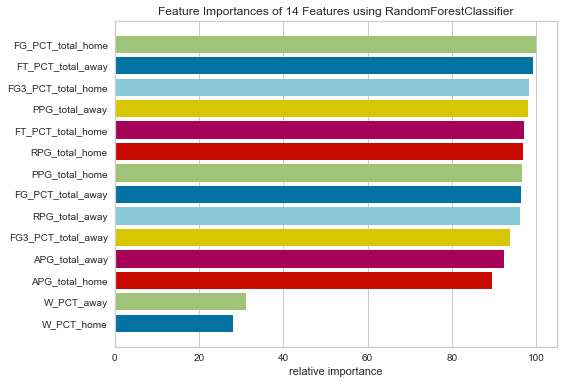

---------------------------------------------
i=24


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.86      0.76       398
           1       0.65      0.38      0.48       268

    accuracy                           0.67       666
   macro avg       0.66      0.62      0.62       666
weighted avg       0.66      0.67      0.64       666



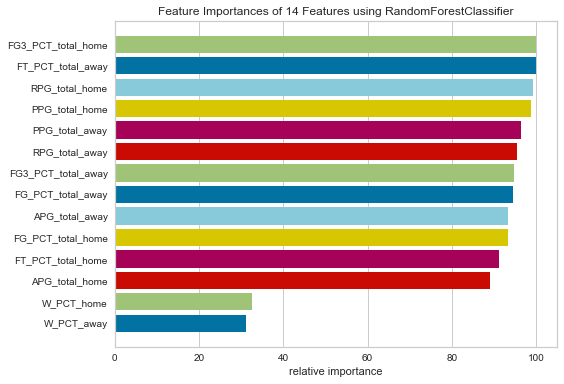

---------------------------------------------
Mean accuracy: 0.682309746027887
Max accuracy: 0.7252252252252253
Min accuracy: 0.6611694152923538
i=25


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.67      0.86      0.76       325
           1       0.70      0.44      0.54       241

    accuracy                           0.68       566
   macro avg       0.69      0.65      0.65       566
weighted avg       0.68      0.68      0.66       566



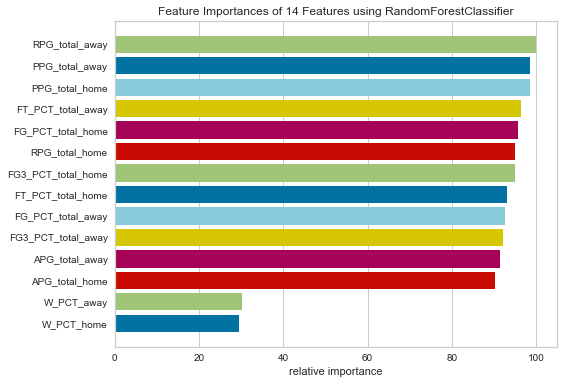

---------------------------------------------
i=26


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       330
           1       0.60      0.40      0.48       236

    accuracy                           0.64       566
   macro avg       0.63      0.60      0.60       566
weighted avg       0.63      0.64      0.62       566



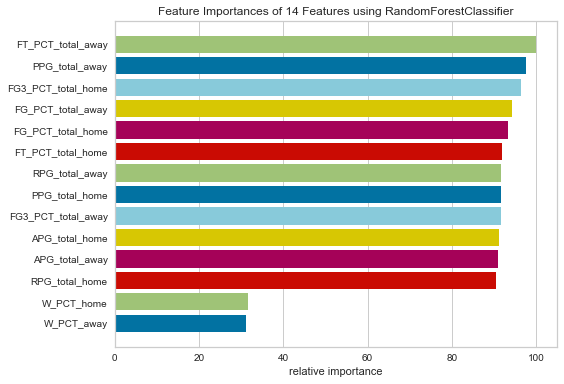

---------------------------------------------
i=27


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.69      0.81      0.74       342
           1       0.60      0.43      0.50       224

    accuracy                           0.66       566
   macro avg       0.64      0.62      0.62       566
weighted avg       0.65      0.66      0.65       566



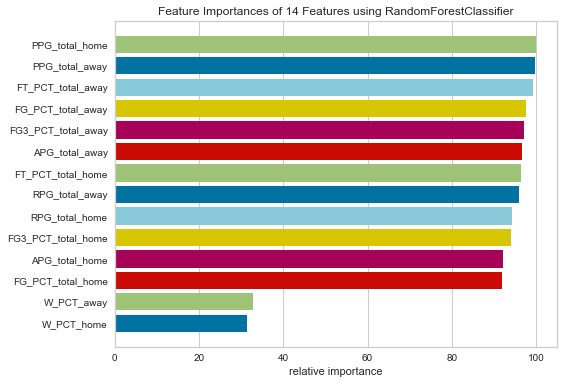

---------------------------------------------
i=28


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.83      0.70       301
           1       0.67      0.39      0.49       265

    accuracy                           0.63       566
   macro avg       0.64      0.61      0.60       566
weighted avg       0.64      0.63      0.60       566



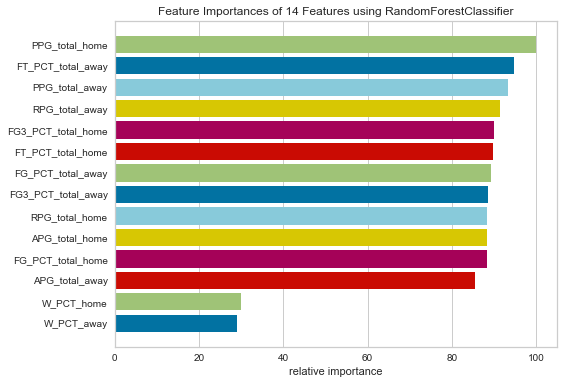

---------------------------------------------
i=29


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       326
           1       0.63      0.43      0.51       240

    accuracy                           0.65       566
   macro avg       0.64      0.62      0.62       566
weighted avg       0.65      0.65      0.64       566



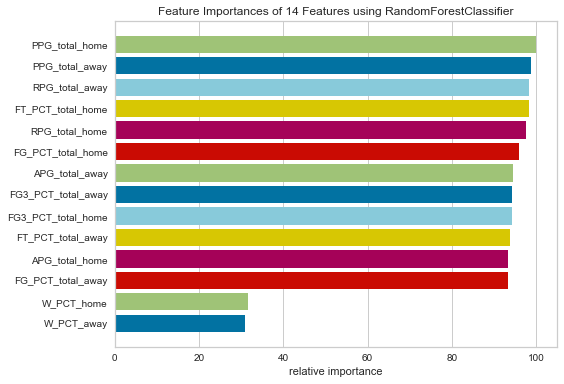

---------------------------------------------
Mean accuracy: 0.651060070671378
Max accuracy: 0.6802120141342756
Min accuracy: 0.6254416961130742


In [26]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {'criterion':['gini','entropy']})

## Try prune max depth

i=0
WINNER:

Best Random Forest accuracy ({'max_depth': 48, 'criterion': 'gini'}): 0.72
              precision    recall  f1-score   support

           0       0.71      0.95      0.82       639
           1       0.77      0.29      0.42       342

    accuracy                           0.72       981
   macro avg       0.74      0.62      0.62       981
weighted avg       0.73      0.72      0.68       981



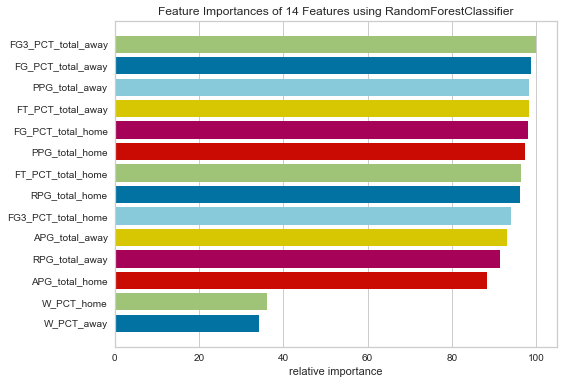

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'max_depth': 17, 'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       646
           1       0.65      0.27      0.38       335

    accuracy                           0.70       981
   macro avg       0.68      0.60      0.59       981
weighted avg       0.69      0.70      0.66       981



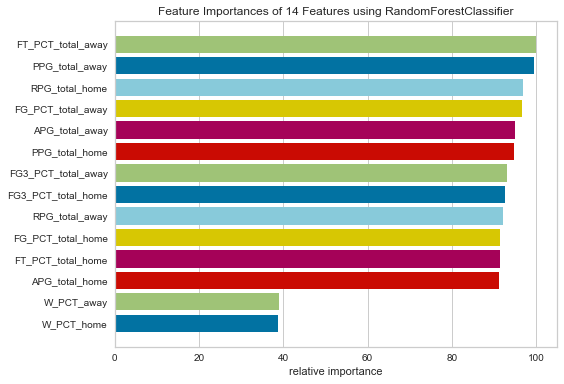

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'max_depth': 27, 'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       612
           1       0.73      0.30      0.43       368

    accuracy                           0.70       980
   macro avg       0.71      0.62      0.61       980
weighted avg       0.70      0.70      0.66       980



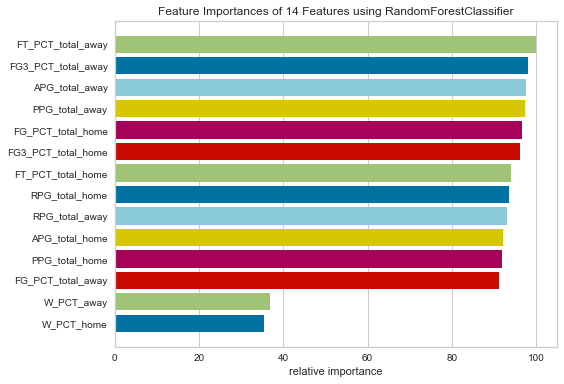

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'max_depth': 32, 'criterion': 'entropy'}): 0.74
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       646
           1       0.80      0.32      0.46       334

    accuracy                           0.74       980
   macro avg       0.77      0.64      0.65       980
weighted avg       0.76      0.74      0.70       980



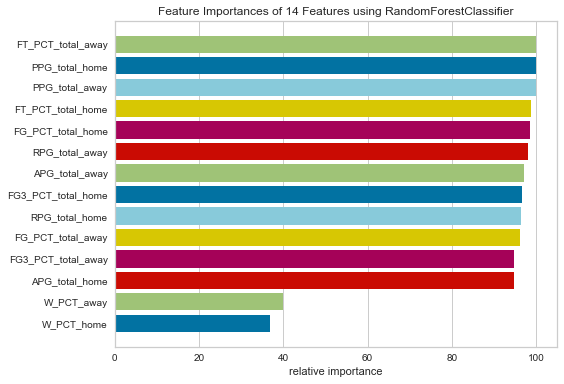

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'max_depth': 16, 'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.67      0.94      0.79       615
           1       0.71      0.23      0.35       365

    accuracy                           0.68       980
   macro avg       0.69      0.59      0.57       980
weighted avg       0.69      0.68      0.62       980



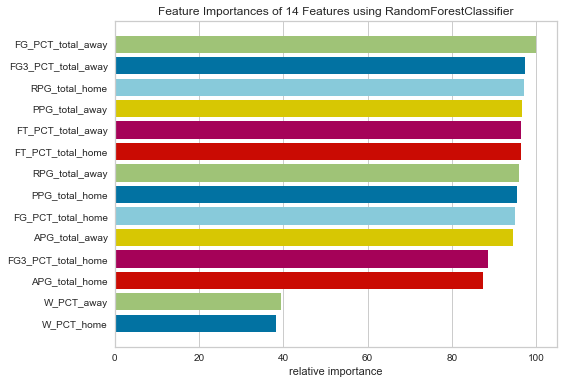

---------------------------------------------
Mean accuracy: 0.7146885206682061
Max accuracy: 0.7418367346938776
Min accuracy: 0.6959183673469388
i=5
FGP:

Best Random Forest accuracy ({'max_depth': 33, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       422
           1       0.69      0.33      0.45       281

    accuracy                           0.67       703
   macro avg       0.68      0.62      0.61       703
weighted avg       0.68      0.67      0.64       703



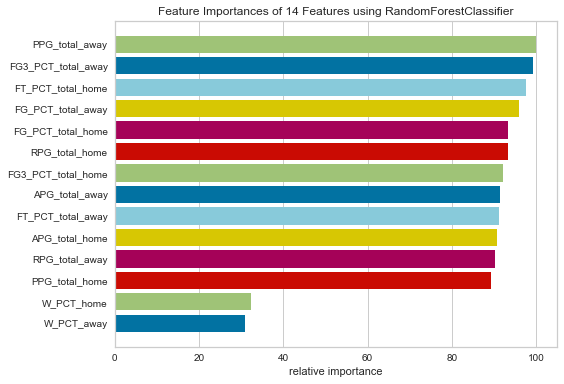

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'max_depth': 51, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       431
           1       0.61      0.37      0.46       272

    accuracy                           0.66       703
   macro avg       0.64      0.61      0.61       703
weighted avg       0.65      0.66      0.64       703



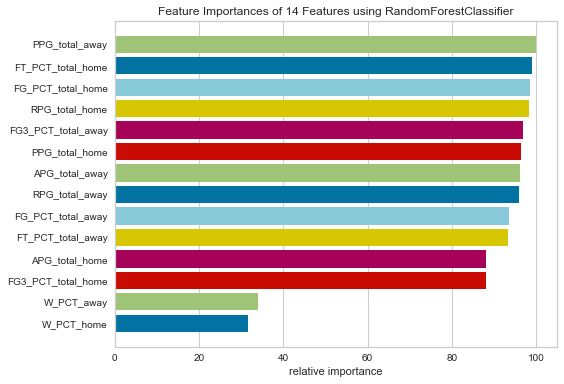

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'max_depth': 21, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       424
           1       0.69      0.27      0.39       279

    accuracy                           0.66       703
   macro avg       0.67      0.60      0.58       703
weighted avg       0.67      0.66      0.62       703



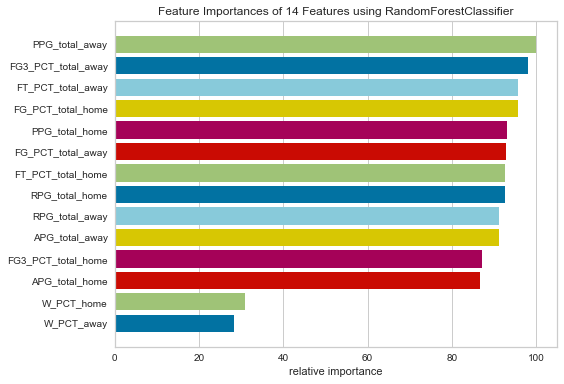

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'max_depth': 34, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       443
           1       0.57      0.27      0.37       260

    accuracy                           0.65       703
   macro avg       0.62      0.58      0.57       703
weighted avg       0.63      0.65      0.62       703



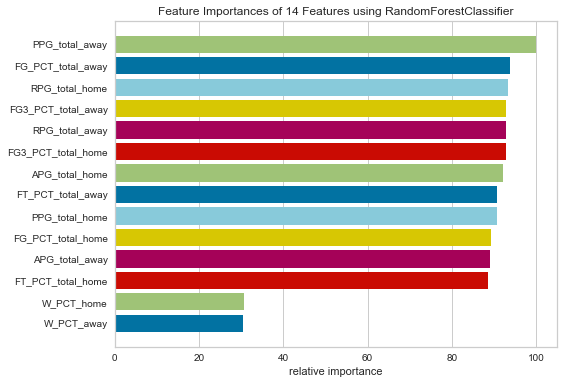

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'max_depth': 36, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       417
           1       0.68      0.32      0.44       285

    accuracy                           0.66       702
   macro avg       0.67      0.61      0.60       702
weighted avg       0.67      0.66      0.63       702



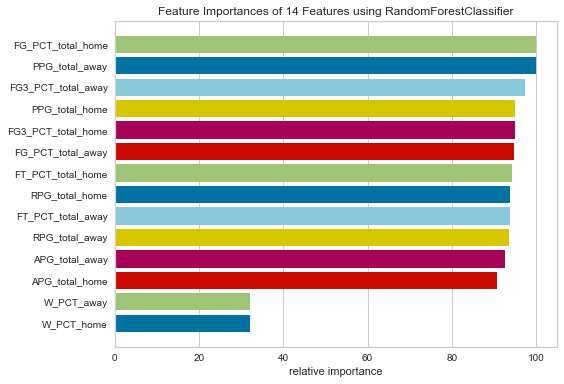

---------------------------------------------
Mean accuracy: 0.6639402560455192
Max accuracy: 0.6742532005689901
Min accuracy: 0.6543385490753911
i=10
FG3:

Best Random Forest accuracy ({'max_depth': 27, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       233
           1       0.61      0.55      0.58       215

    accuracy                           0.62       448
   macro avg       0.62      0.62      0.62       448
weighted avg       0.62      0.62      0.62       448



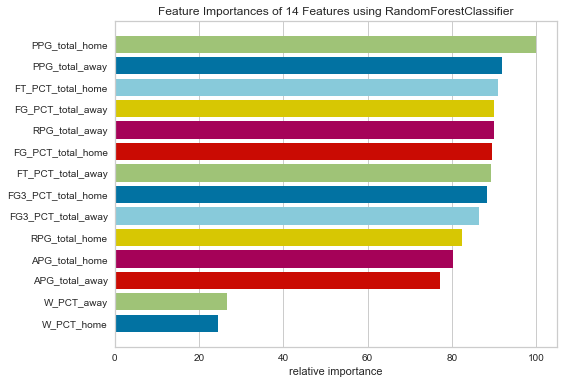

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'max_depth': 54, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       239
           1       0.60      0.53      0.56       209

    accuracy                           0.62       448
   macro avg       0.61      0.61      0.61       448
weighted avg       0.61      0.62      0.61       448



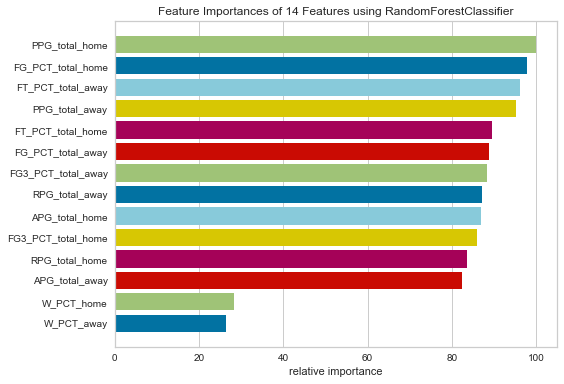

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'max_depth': 32, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.60      0.76      0.67       234
           1       0.63      0.46      0.53       213

    accuracy                           0.61       447
   macro avg       0.62      0.61      0.60       447
weighted avg       0.62      0.61      0.60       447



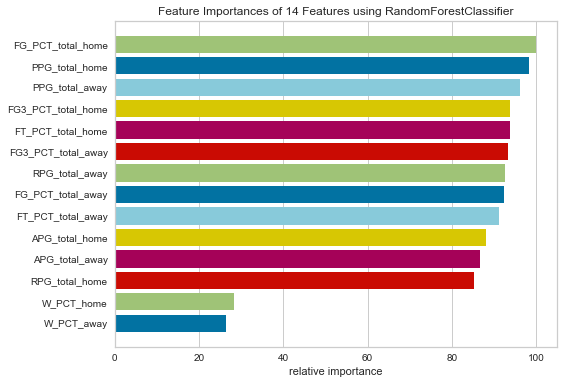

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'max_depth': 26, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       230
           1       0.65      0.58      0.61       217

    accuracy                           0.65       447
   macro avg       0.65      0.64      0.64       447
weighted avg       0.65      0.65      0.64       447



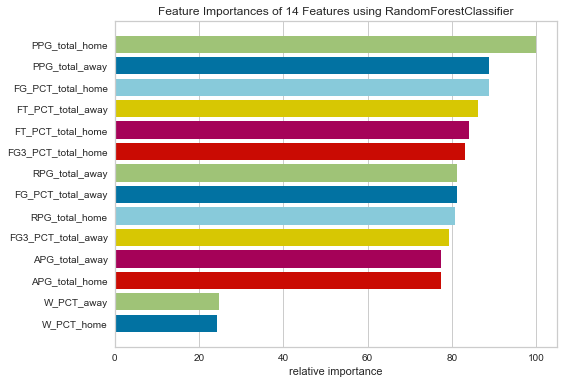

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'max_depth': 43, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.68      0.63       228
           1       0.60      0.50      0.54       219

    accuracy                           0.59       447
   macro avg       0.59      0.59      0.59       447
weighted avg       0.59      0.59      0.59       447



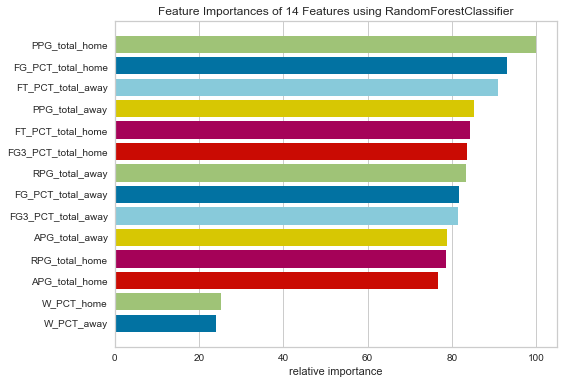

---------------------------------------------
Mean accuracy: 0.6234707074944071
Max accuracy: 0.6465324384787472
Min accuracy: 0.6129753914988815
i=15
FT:

Best Random Forest accuracy ({'max_depth': 17, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       215
           1       0.61      0.65      0.63       221

    accuracy                           0.61       436
   macro avg       0.61      0.61      0.61       436
weighted avg       0.61      0.61      0.61       436



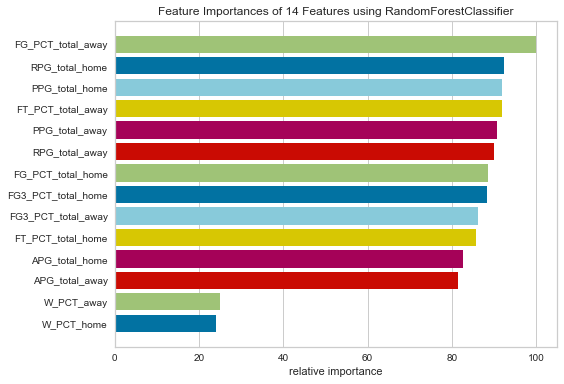

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'max_depth': 45, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.56      0.58       216
           1       0.59      0.62      0.60       220

    accuracy                           0.59       436
   macro avg       0.59      0.59      0.59       436
weighted avg       0.59      0.59      0.59       436



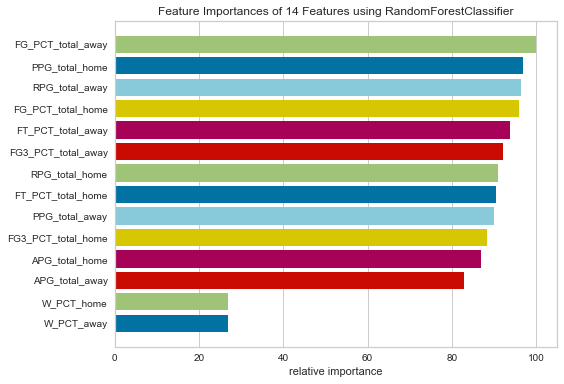

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'max_depth': 16, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.55      0.56       209
           1       0.60      0.63      0.62       227

    accuracy                           0.59       436
   macro avg       0.59      0.59      0.59       436
weighted avg       0.59      0.59      0.59       436



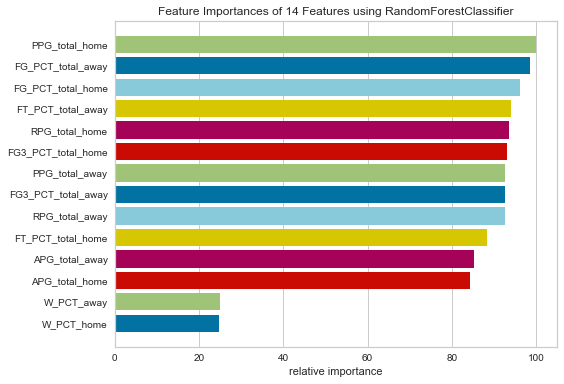

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'max_depth': 28, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       208
           1       0.60      0.57      0.58       228

    accuracy                           0.57       436
   macro avg       0.57      0.57      0.57       436
weighted avg       0.57      0.57      0.57       436



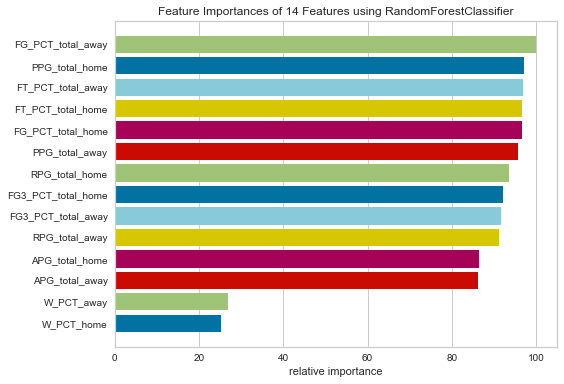

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'max_depth': 49, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       217
           1       0.61      0.61      0.61       219

    accuracy                           0.61       436
   macro avg       0.61      0.61      0.61       436
weighted avg       0.61      0.61      0.61       436



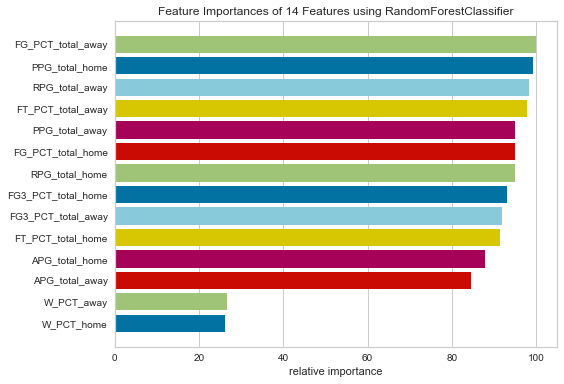

---------------------------------------------
Mean accuracy: 0.5911697247706422
Max accuracy: 0.6100917431192661
Min accuracy: 0.573394495412844
i=20
AST:

Best Random Forest accuracy ({'max_depth': 33, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       385
           1       0.73      0.34      0.46       282

    accuracy                           0.67       667
   macro avg       0.69      0.62      0.61       667
weighted avg       0.69      0.67      0.63       667



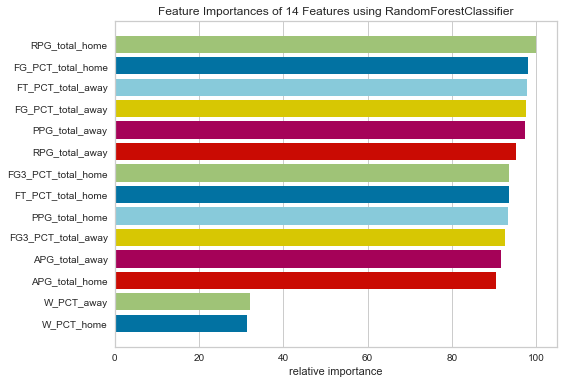

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'max_depth': 22, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       396
           1       0.63      0.38      0.47       271

    accuracy                           0.66       667
   macro avg       0.65      0.61      0.61       667
weighted avg       0.65      0.66      0.64       667



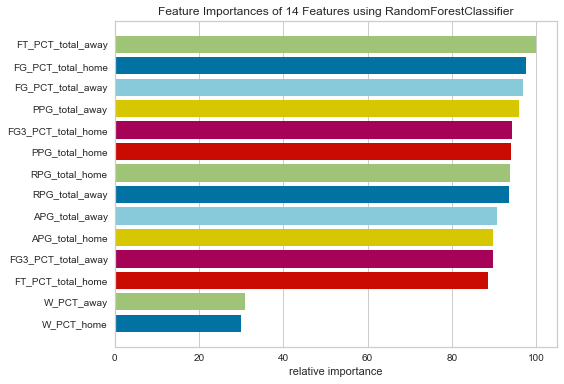

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'max_depth': 31, 'criterion': 'entropy'}): 0.72
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       412
           1       0.73      0.42      0.53       254

    accuracy                           0.72       666
   macro avg       0.72      0.66      0.67       666
weighted avg       0.72      0.72      0.70       666



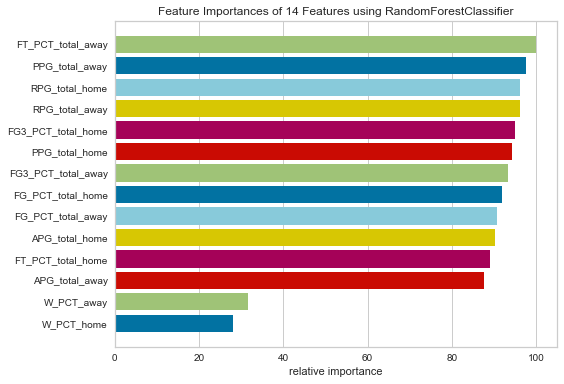

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'max_depth': 56, 'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.69      0.86      0.77       413
           1       0.62      0.38      0.47       253

    accuracy                           0.68       666
   macro avg       0.66      0.62      0.62       666
weighted avg       0.67      0.68      0.66       666



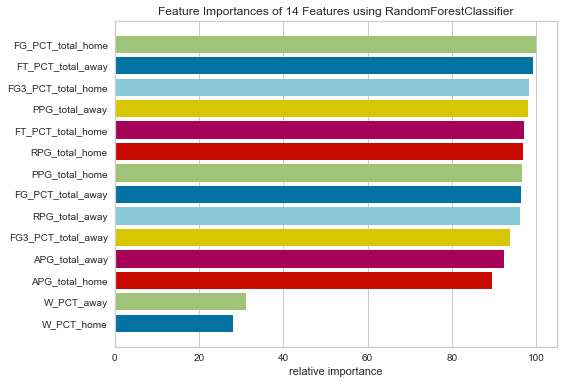

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'max_depth': 23, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       398
           1       0.63      0.39      0.48       268

    accuracy                           0.66       666
   macro avg       0.65      0.62      0.62       666
weighted avg       0.66      0.66      0.64       666



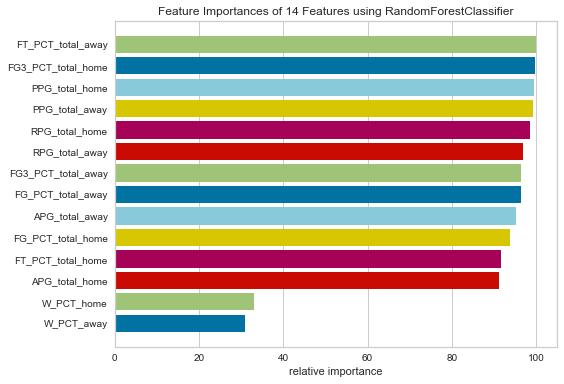

---------------------------------------------
Mean accuracy: 0.6804334319326824
Max accuracy: 0.7192192192192193
Min accuracy: 0.6581709145427287
i=25
REB:

Best Random Forest accuracy ({'max_depth': 35, 'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.67      0.86      0.76       325
           1       0.70      0.44      0.54       241

    accuracy                           0.68       566
   macro avg       0.69      0.65      0.65       566
weighted avg       0.69      0.68      0.66       566



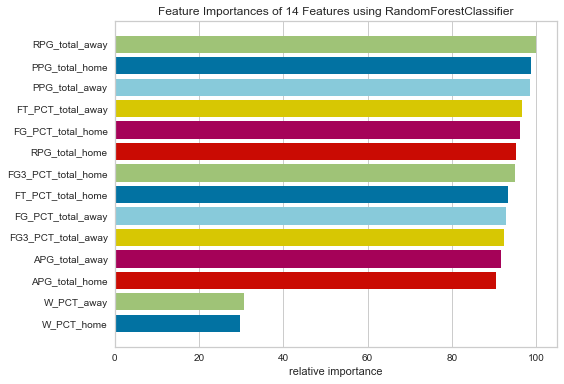

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'max_depth': 30, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       330
           1       0.60      0.40      0.48       236

    accuracy                           0.64       566
   macro avg       0.63      0.60      0.60       566
weighted avg       0.63      0.64      0.62       566



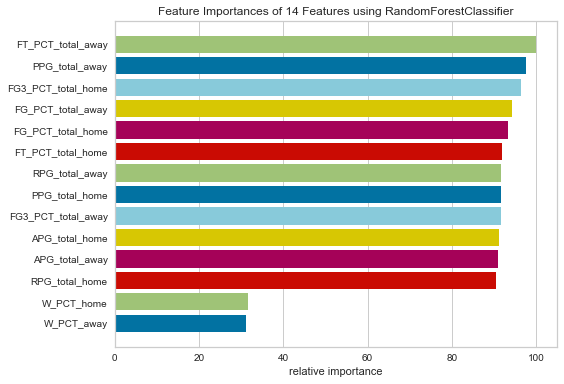

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'max_depth': 18, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.68      0.80      0.73       342
           1       0.58      0.42      0.49       224

    accuracy                           0.65       566
   macro avg       0.63      0.61      0.61       566
weighted avg       0.64      0.65      0.64       566



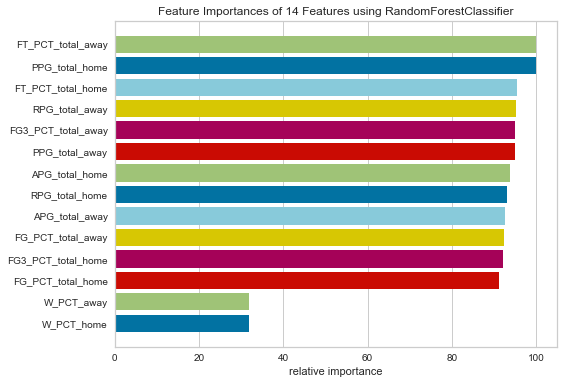

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'max_depth': 18, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.60      0.82      0.70       301
           1       0.66      0.39      0.49       265

    accuracy                           0.62       566
   macro avg       0.63      0.60      0.59       566
weighted avg       0.63      0.62      0.60       566



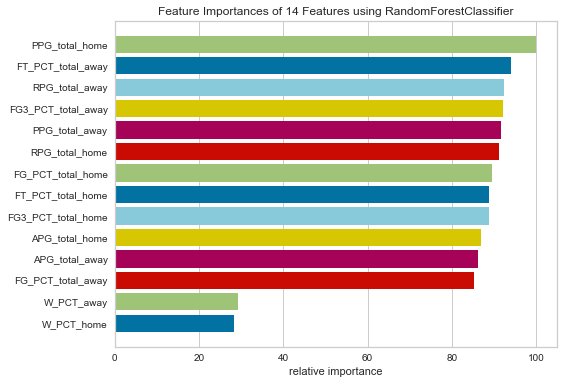

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'max_depth': 27, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       326
           1       0.62      0.43      0.51       240

    accuracy                           0.64       566
   macro avg       0.64      0.62      0.62       566
weighted avg       0.64      0.64      0.63       566



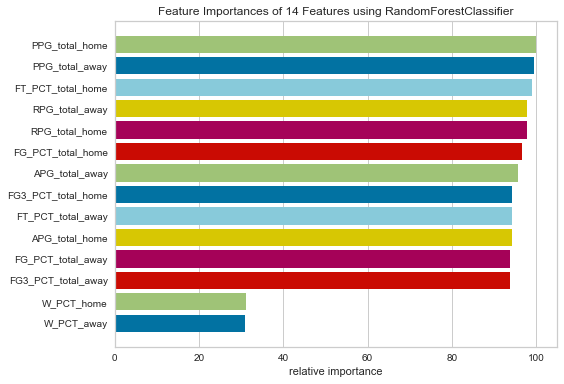

---------------------------------------------
Mean accuracy: 0.6470848056537102
Max accuracy: 0.6819787985865724
Min accuracy: 0.6183745583038869


In [27]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_depth': [*range(4,60)],
    'criterion': ['gini', 'entropy'],
})

## Try prune impurity decrease

i=0
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.72
              precision    recall  f1-score   support

           0       0.71      0.95      0.82       639
           1       0.77      0.29      0.42       342

    accuracy                           0.72       981
   macro avg       0.74      0.62      0.62       981
weighted avg       0.73      0.72      0.68       981



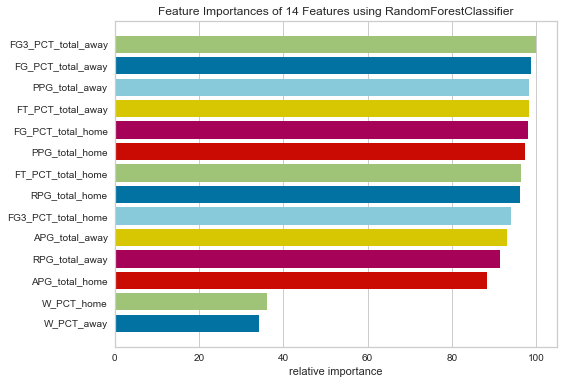

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.15, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       646
           1       0.00      0.00      0.00       335

    accuracy                           0.66       981
   macro avg       0.33      0.50      0.40       981
weighted avg       0.43      0.66      0.52       981



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

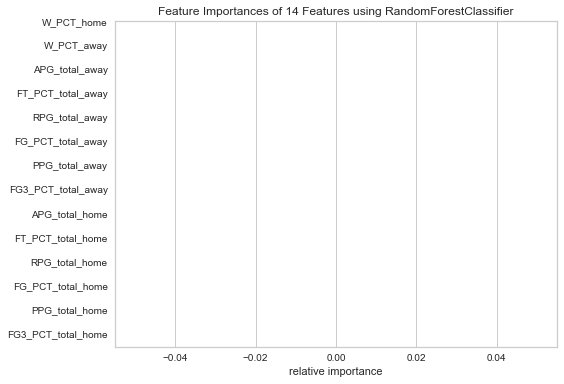

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       612
           1       0.72      0.29      0.41       368

    accuracy                           0.69       980
   macro avg       0.70      0.61      0.60       980
weighted avg       0.70      0.69      0.65       980



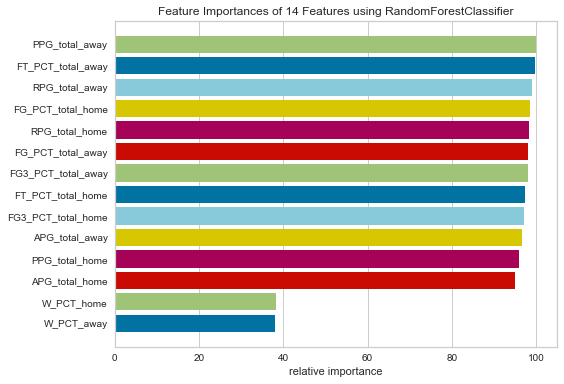

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.2, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       646
           1       0.00      0.00      0.00       334

    accuracy                           0.66       980
   macro avg       0.33      0.50      0.40       980
weighted avg       0.43      0.66      0.52       980



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

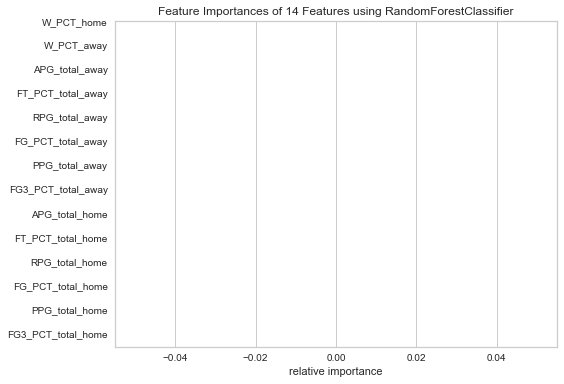

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.65, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       615
           1       0.00      0.00      0.00       365

    accuracy                           0.63       980
   macro avg       0.31      0.50      0.39       980
weighted avg       0.39      0.63      0.48       980



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

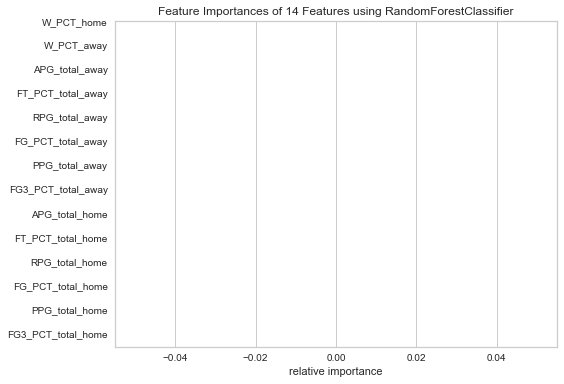

---------------------------------------------
Mean accuracy: 0.6823012232415903
Max accuracy: 0.7206931702344547
Min accuracy: 0.6585117227319062
i=5
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.55, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       422
           1       0.00      0.00      0.00       281

    accuracy                           0.60       703
   macro avg       0.30      0.50      0.38       703
weighted avg       0.36      0.60      0.45       703



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

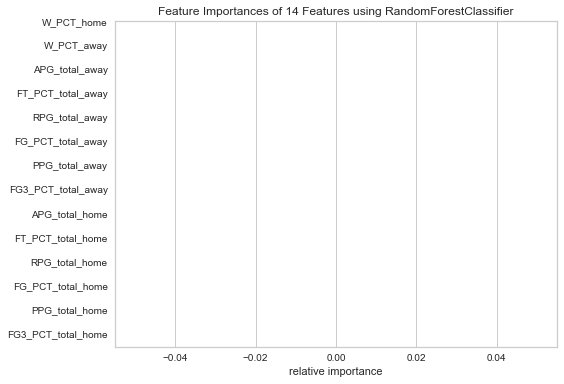

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       431
           1       0.70      0.39      0.50       272

    accuracy                           0.70       703
   macro avg       0.70      0.64      0.64       703
weighted avg       0.70      0.70      0.67       703



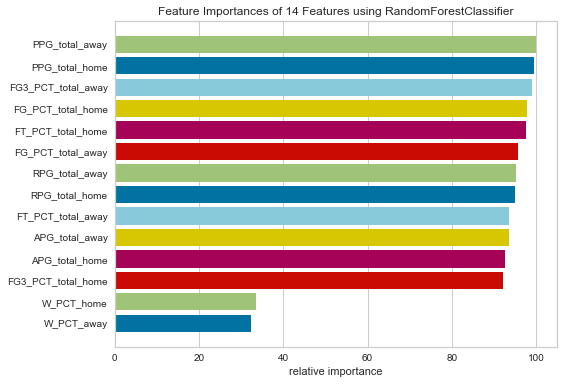

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.85, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       424
           1       0.00      0.00      0.00       279

    accuracy                           0.60       703
   macro avg       0.30      0.50      0.38       703
weighted avg       0.36      0.60      0.45       703



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

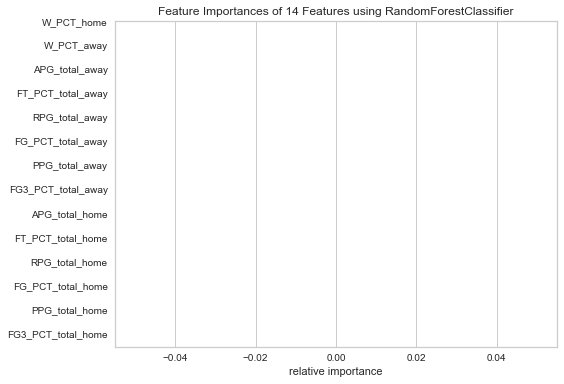

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.15, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       443
           1       0.00      0.00      0.00       260

    accuracy                           0.63       703
   macro avg       0.32      0.50      0.39       703
weighted avg       0.40      0.63      0.49       703



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

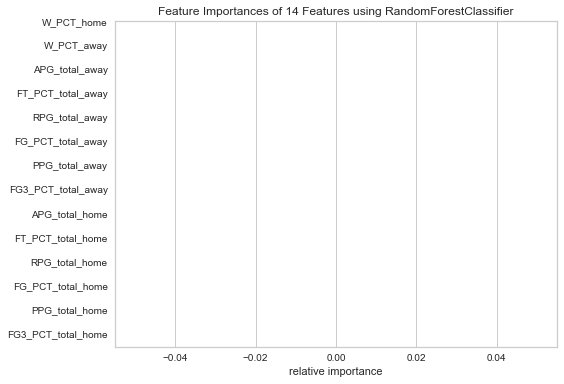

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      1.00      0.75       417
           1       0.00      0.00      0.00       285

    accuracy                           0.59       702
   macro avg       0.30      0.50      0.37       702
weighted avg       0.35      0.59      0.44       702



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

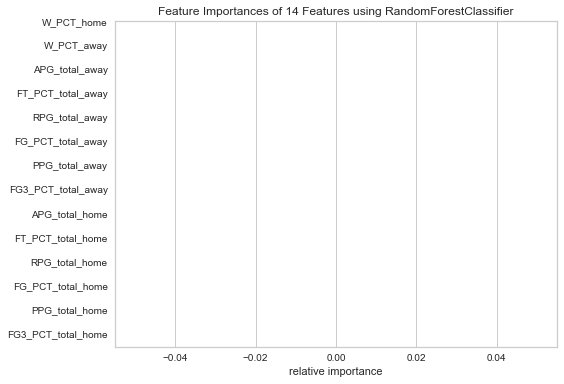

---------------------------------------------
Mean accuracy: 0.6330014224751066
Max accuracy: 0.6984352773826458
Min accuracy: 0.6002844950213371
i=10
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.69      0.65       233
           1       0.61      0.53      0.57       215

    accuracy                           0.62       448
   macro avg       0.62      0.61      0.61       448
weighted avg       0.62      0.62      0.61       448



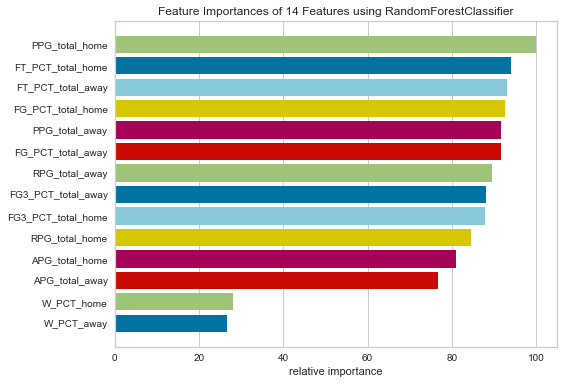

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.5, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.53      1.00      0.70       239
           1       0.00      0.00      0.00       209

    accuracy                           0.53       448
   macro avg       0.27      0.50      0.35       448
weighted avg       0.28      0.53      0.37       448



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

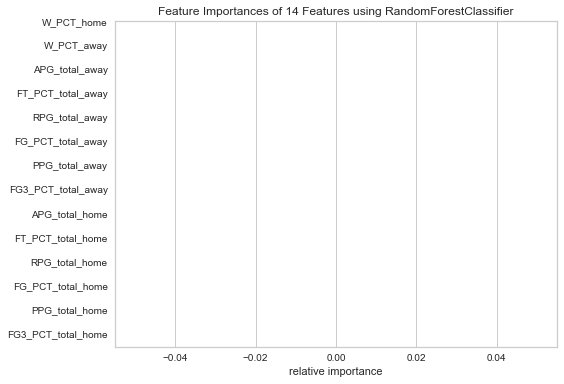

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.61      0.76      0.67       234
           1       0.63      0.46      0.53       213

    accuracy                           0.62       447
   macro avg       0.62      0.61      0.60       447
weighted avg       0.62      0.62      0.61       447



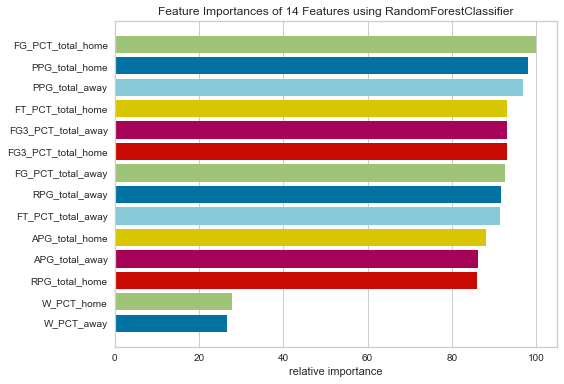

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.69      0.64       230
           1       0.61      0.53      0.57       217

    accuracy                           0.61       447
   macro avg       0.61      0.61      0.61       447
weighted avg       0.61      0.61      0.61       447



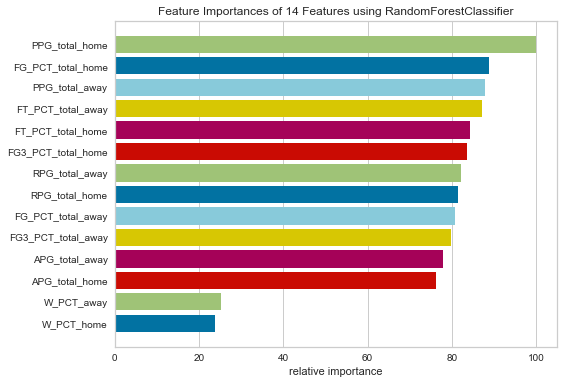

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.68      0.63       228
           1       0.60      0.50      0.54       219

    accuracy                           0.59       447
   macro avg       0.59      0.59      0.59       447
weighted avg       0.59      0.59      0.59       447



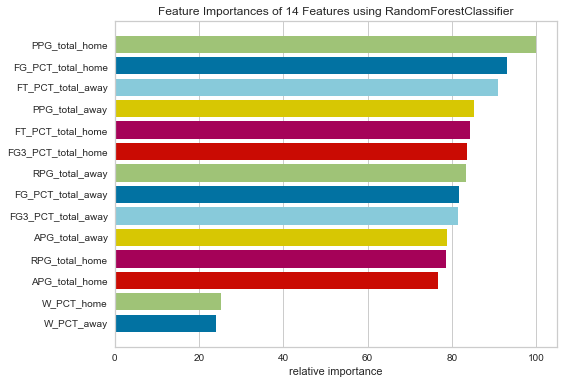

---------------------------------------------
Mean accuracy: 0.5938760886065836
Max accuracy: 0.6160714285714286
Min accuracy: 0.5334821428571429
i=15
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.6, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       215
           1       0.51      1.00      0.67       221

    accuracy                           0.51       436
   macro avg       0.25      0.50      0.34       436
weighted avg       0.26      0.51      0.34       436



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

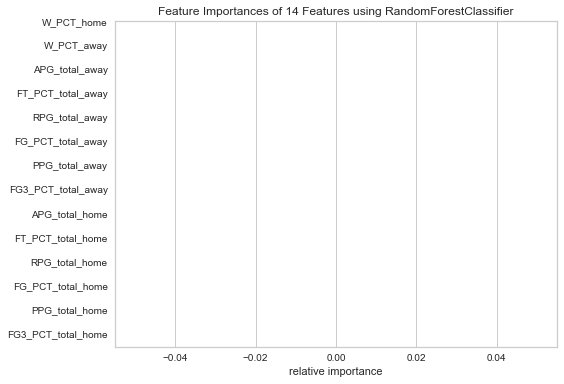

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.65, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.50      1.00      0.67       220

    accuracy                           0.50       436
   macro avg       0.25      0.50      0.34       436
weighted avg       0.25      0.50      0.34       436



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

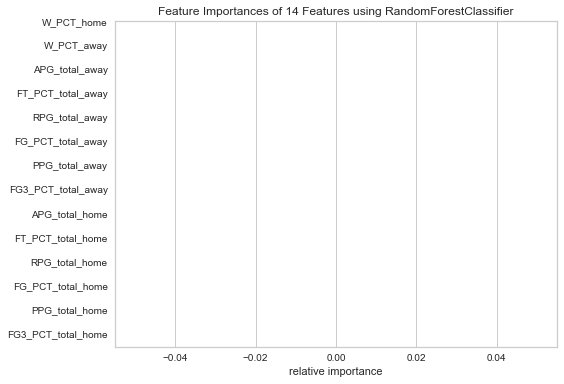

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.9, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       209
           1       0.52      1.00      0.68       227

    accuracy                           0.52       436
   macro avg       0.26      0.50      0.34       436
weighted avg       0.27      0.52      0.36       436



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

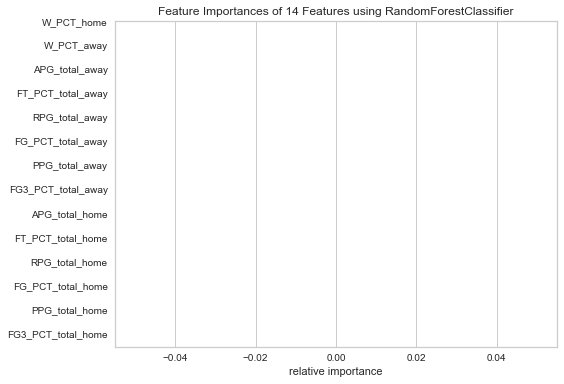

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       208
           1       0.52      1.00      0.69       228

    accuracy                           0.52       436
   macro avg       0.26      0.50      0.34       436
weighted avg       0.27      0.52      0.36       436



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

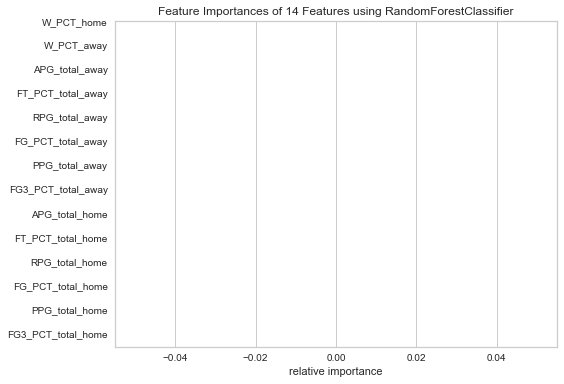

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       217
           1       0.63      0.65      0.64       219

    accuracy                           0.63       436
   macro avg       0.63      0.63      0.63       436
weighted avg       0.63      0.63      0.63       436



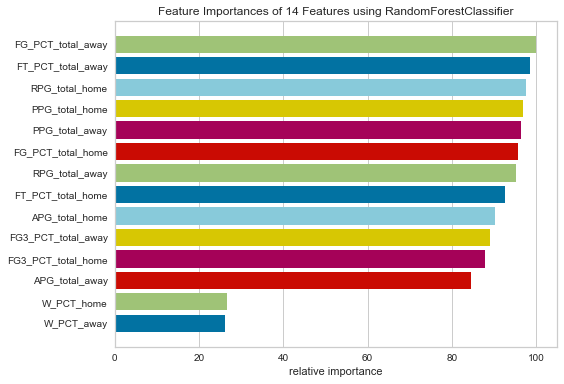

---------------------------------------------
Mean accuracy: 0.5137614678899083
Max accuracy: 0.5229357798165137
Min accuracy: 0.5045871559633027
i=20
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.25, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       385
           1       0.00      0.00      0.00       282

    accuracy                           0.58       667
   macro avg       0.29      0.50      0.37       667
weighted avg       0.33      0.58      0.42       667



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

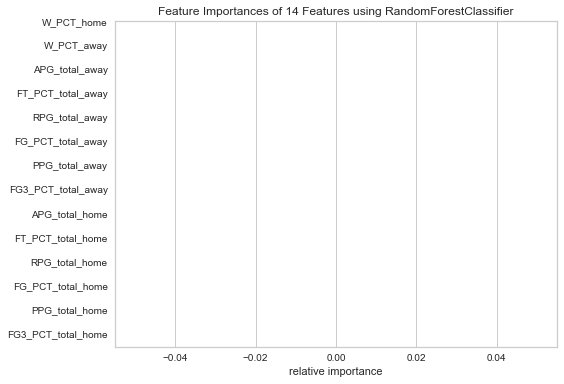

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.1, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.59      1.00      0.75       396
           1       0.00      0.00      0.00       271

    accuracy                           0.59       667
   macro avg       0.30      0.50      0.37       667
weighted avg       0.35      0.59      0.44       667



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

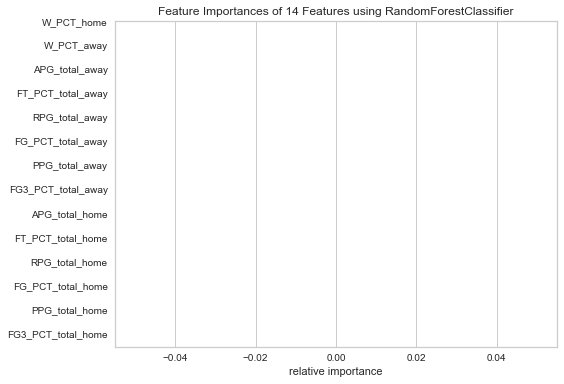

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.73
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       412
           1       0.74      0.43      0.54       254

    accuracy                           0.73       666
   macro avg       0.73      0.67      0.67       666
weighted avg       0.73      0.73      0.70       666



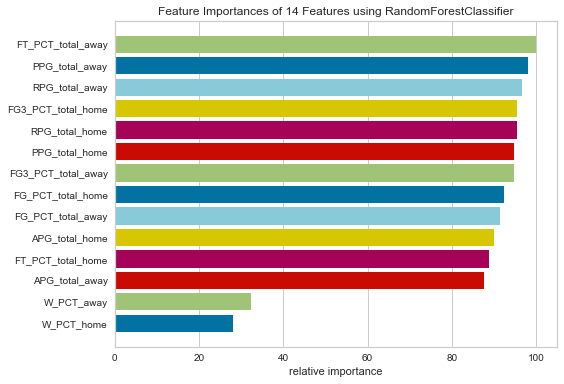

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.4, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       413
           1       0.00      0.00      0.00       253

    accuracy                           0.62       666
   macro avg       0.31      0.50      0.38       666
weighted avg       0.38      0.62      0.47       666



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

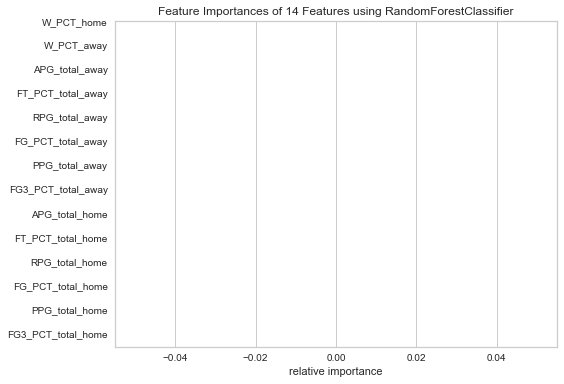

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.95, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       398
           1       0.00      0.00      0.00       268

    accuracy                           0.60       666
   macro avg       0.30      0.50      0.37       666
weighted avg       0.36      0.60      0.45       666



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

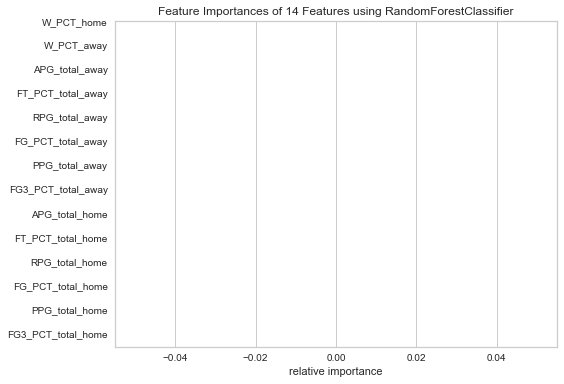

---------------------------------------------
Mean accuracy: 0.6290649720184952
Max accuracy: 0.7252252252252253
Min accuracy: 0.5772113943028486
i=25
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       325
           1       0.69      0.43      0.53       241

    accuracy                           0.67       566
   macro avg       0.68      0.64      0.64       566
weighted avg       0.68      0.67      0.66       566



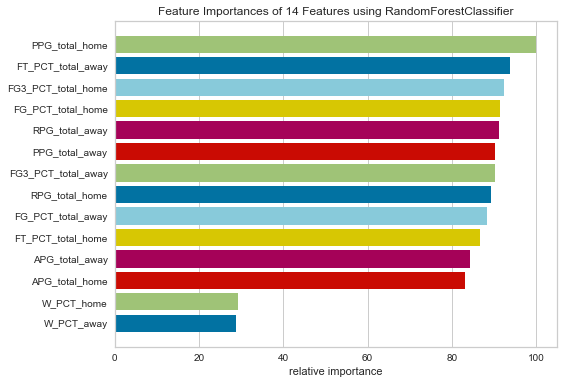

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.5, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       330
           1       0.00      0.00      0.00       236

    accuracy                           0.58       566
   macro avg       0.29      0.50      0.37       566
weighted avg       0.34      0.58      0.43       566



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

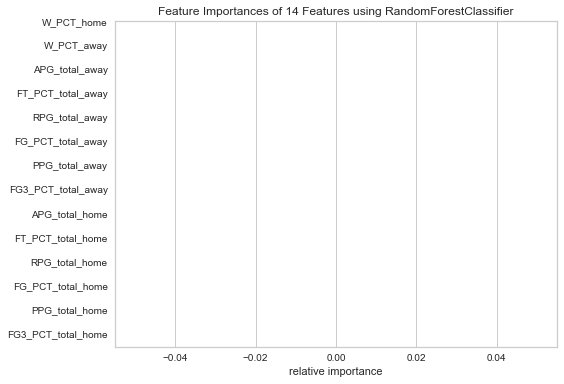

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.55, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       342
           1       0.00      0.00      0.00       224

    accuracy                           0.60       566
   macro avg       0.30      0.50      0.38       566
weighted avg       0.37      0.60      0.46       566



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

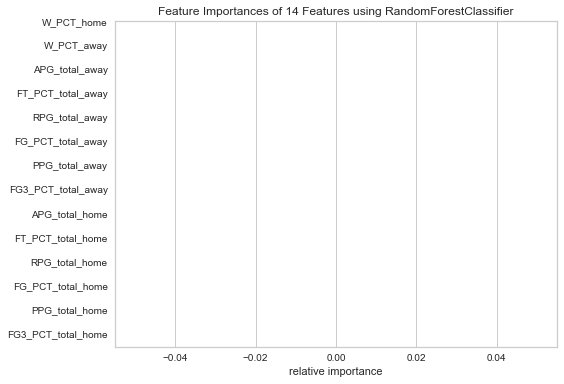

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.83      0.70       301
           1       0.67      0.39      0.49       265

    accuracy                           0.63       566
   macro avg       0.64      0.61      0.60       566
weighted avg       0.64      0.63      0.60       566



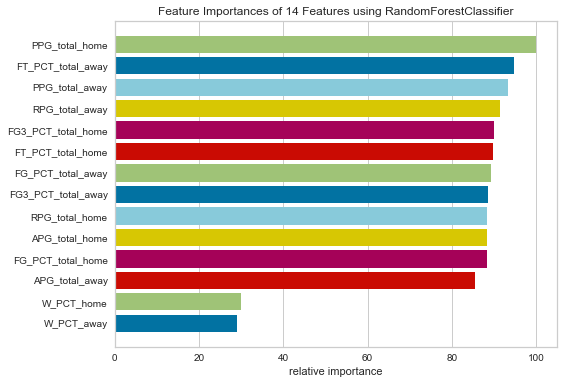

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.9, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       326
           1       0.00      0.00      0.00       240

    accuracy                           0.58       566
   macro avg       0.29      0.50      0.37       566
weighted avg       0.33      0.58      0.42       566



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

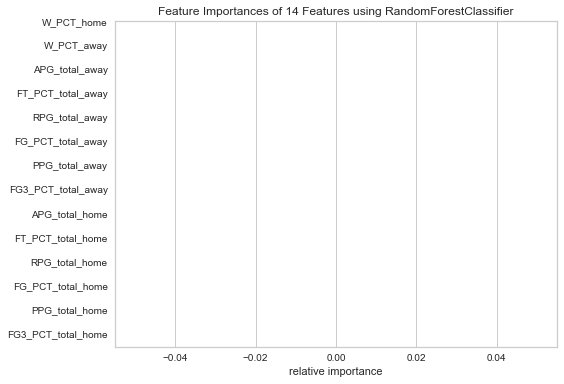

---------------------------------------------
Mean accuracy: 0.6219081272084805
Max accuracy: 0.6749116607773852
Min accuracy: 0.5830388692579506


In [28]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'min_impurity_decrease': [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95],
    'criterion': ['gini', 'entropy'],
})
# print('Any non-zero min_impurity_decrease causes all classifications to be 1')

## Try prune max leaves

i=0
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 660, 'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.93      0.81       639
           1       0.70      0.30      0.42       342

    accuracy                           0.71       981
   macro avg       0.71      0.61      0.61       981
weighted avg       0.71      0.71      0.67       981



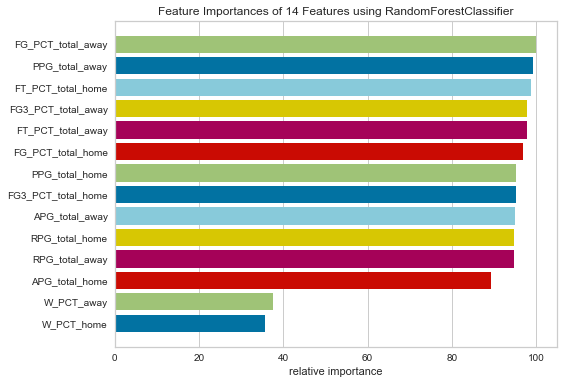

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 876, 'criterion': 'gini'}): 0.72
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       646
           1       0.69      0.30      0.42       335

    accuracy                           0.72       981
   macro avg       0.70      0.62      0.62       981
weighted avg       0.71      0.72      0.68       981



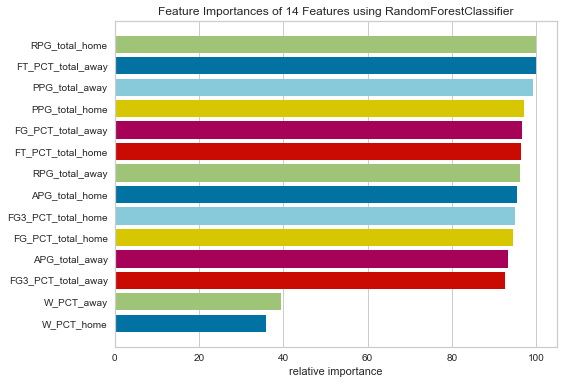

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 956, 'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       612
           1       0.73      0.30      0.43       368

    accuracy                           0.70       980
   macro avg       0.71      0.62      0.61       980
weighted avg       0.70      0.70      0.66       980



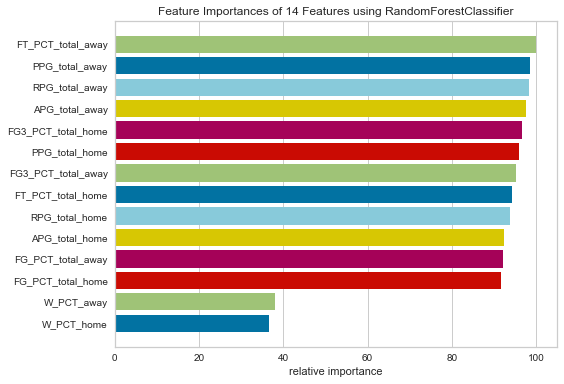

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 538, 'criterion': 'gini'}): 0.73
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       646
           1       0.72      0.32      0.45       334

    accuracy                           0.73       980
   macro avg       0.72      0.63      0.63       980
weighted avg       0.73      0.73      0.69       980



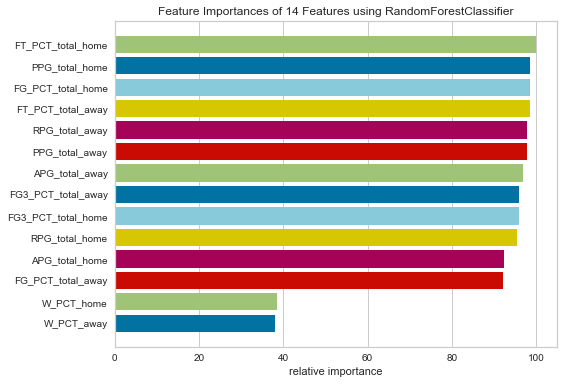

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 790, 'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.69      0.94      0.79       615
           1       0.73      0.28      0.40       365

    accuracy                           0.69       980
   macro avg       0.71      0.61      0.60       980
weighted avg       0.70      0.69      0.65       980



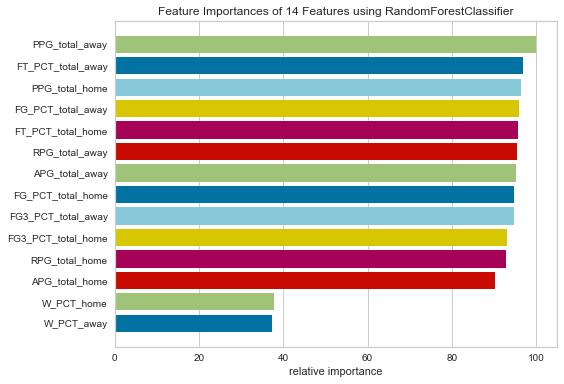

---------------------------------------------
Mean accuracy: 0.7121362000457676
Max accuracy: 0.726530612244898
Min accuracy: 0.6959183673469388
i=5
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 620, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.89      0.76       422
           1       0.67      0.34      0.45       281

    accuracy                           0.67       703
   macro avg       0.67      0.61      0.61       703
weighted avg       0.67      0.67      0.64       703



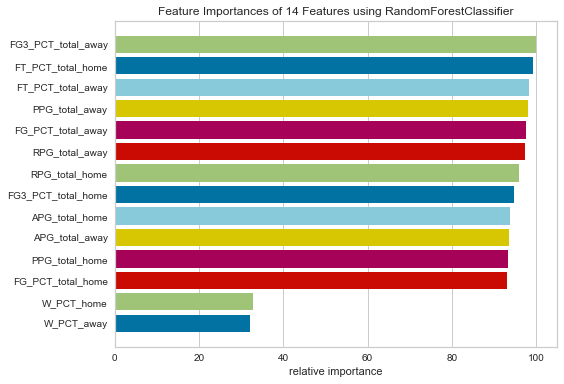

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 912, 'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       431
           1       0.71      0.39      0.51       272

    accuracy                           0.70       703
   macro avg       0.70      0.65      0.65       703
weighted avg       0.70      0.70      0.68       703



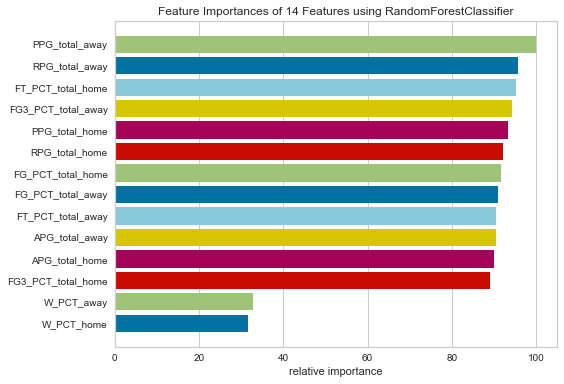

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 740, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       424
           1       0.68      0.31      0.43       279

    accuracy                           0.67       703
   macro avg       0.67      0.61      0.60       703
weighted avg       0.67      0.67      0.63       703



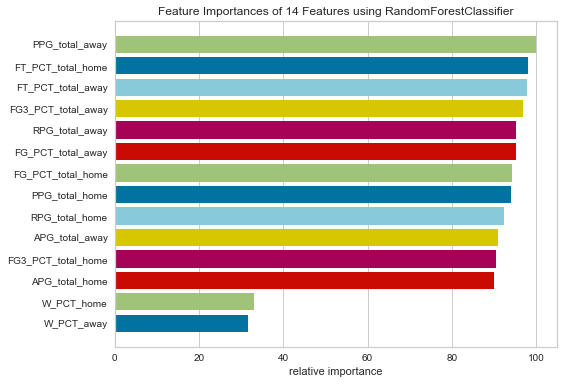

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 868, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       443
           1       0.57      0.29      0.38       260

    accuracy                           0.66       703
   macro avg       0.62      0.58      0.57       703
weighted avg       0.64      0.66      0.62       703



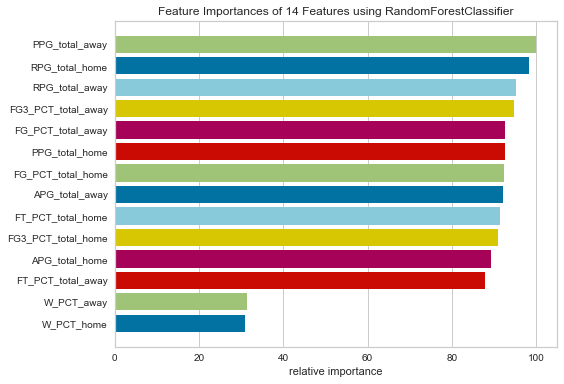

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 752, 'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.67      0.92      0.78       417
           1       0.74      0.35      0.47       285

    accuracy                           0.69       702
   macro avg       0.71      0.63      0.63       702
weighted avg       0.70      0.69      0.65       702



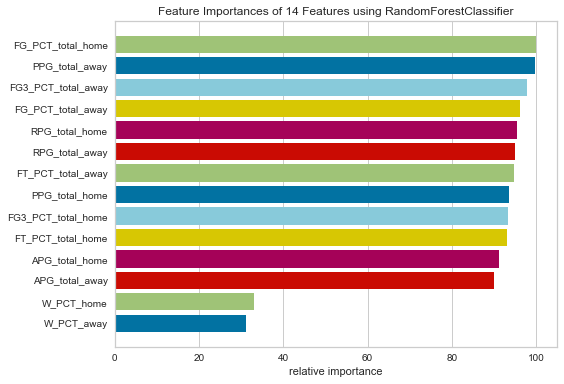

---------------------------------------------
Mean accuracy: 0.6742532005689901
Max accuracy: 0.7027027027027027
Min accuracy: 0.6571834992887624
i=10
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 738, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.61      0.67      0.63       233
           1       0.59      0.53      0.56       215

    accuracy                           0.60       448
   macro avg       0.60      0.60      0.60       448
weighted avg       0.60      0.60      0.60       448



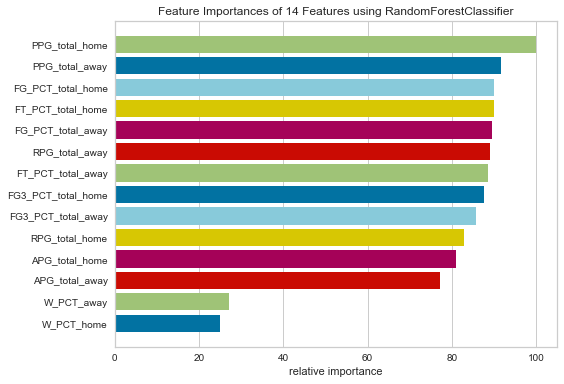

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 546, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.72      0.66       239
           1       0.60      0.48      0.53       209

    accuracy                           0.61       448
   macro avg       0.61      0.60      0.60       448
weighted avg       0.61      0.61      0.60       448



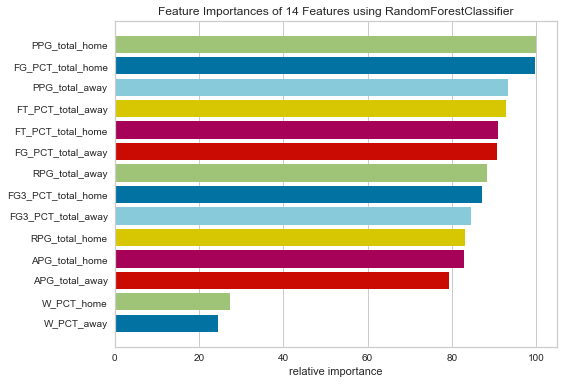

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 954, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.68      0.63       234
           1       0.58      0.47      0.52       213

    accuracy                           0.58       447
   macro avg       0.58      0.58      0.58       447
weighted avg       0.58      0.58      0.58       447



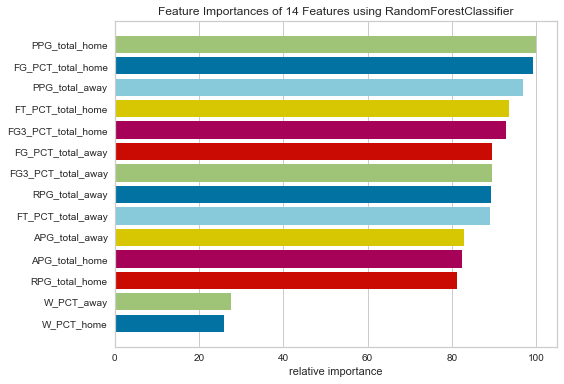

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 228, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.69      0.63       230
           1       0.59      0.47      0.52       217

    accuracy                           0.58       447
   macro avg       0.58      0.58      0.58       447
weighted avg       0.58      0.58      0.58       447



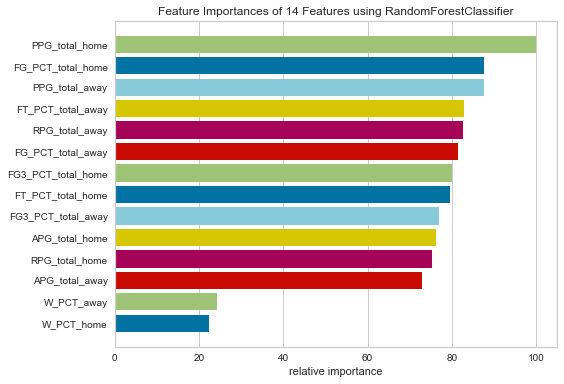

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 548, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.68      0.62       228
           1       0.59      0.48      0.53       219

    accuracy                           0.58       447
   macro avg       0.58      0.58      0.58       447
weighted avg       0.58      0.58      0.58       447



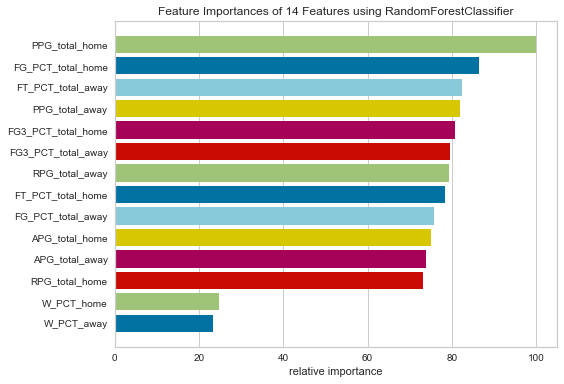

---------------------------------------------
Mean accuracy: 0.5938436301534036
Max accuracy: 0.6071428571428571
Min accuracy: 0.5838926174496645
i=15
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 796, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       215
           1       0.61      0.63      0.62       221

    accuracy                           0.61       436
   macro avg       0.61      0.61      0.61       436
weighted avg       0.61      0.61      0.61       436



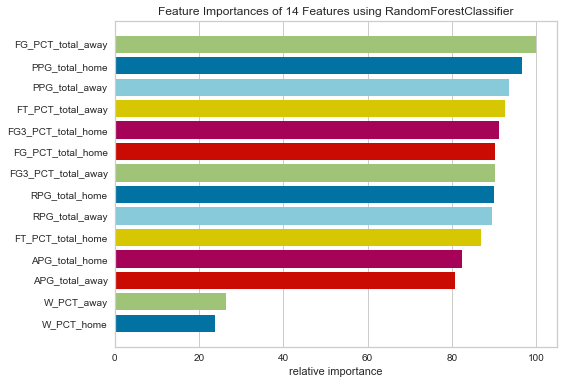

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 980, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       216
           1       0.59      0.63      0.61       220

    accuracy                           0.60       436
   macro avg       0.60      0.60      0.60       436
weighted avg       0.60      0.60      0.60       436



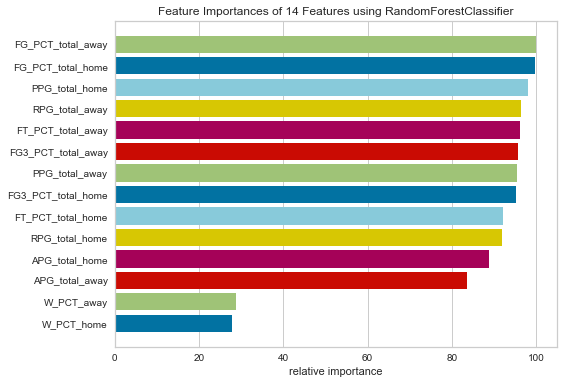

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 250, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       209
           1       0.60      0.62      0.61       227

    accuracy                           0.58       436
   macro avg       0.58      0.58      0.58       436
weighted avg       0.58      0.58      0.58       436



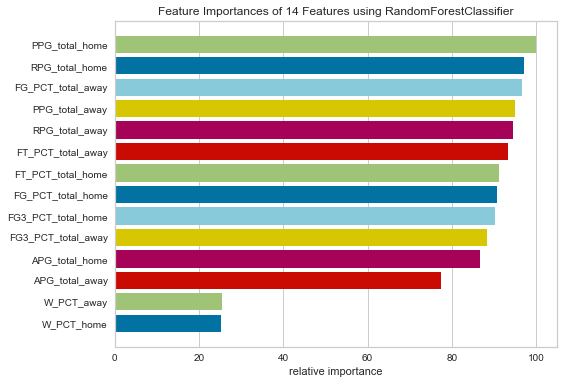

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 390, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.59      0.60      0.60       208
           1       0.63      0.62      0.62       228

    accuracy                           0.61       436
   macro avg       0.61      0.61      0.61       436
weighted avg       0.61      0.61      0.61       436



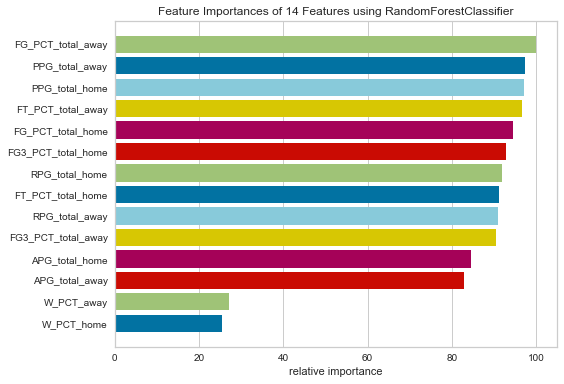

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 318, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.64      0.63      0.64       217
           1       0.64      0.66      0.65       219

    accuracy                           0.64       436
   macro avg       0.64      0.64      0.64       436
weighted avg       0.64      0.64      0.64       436



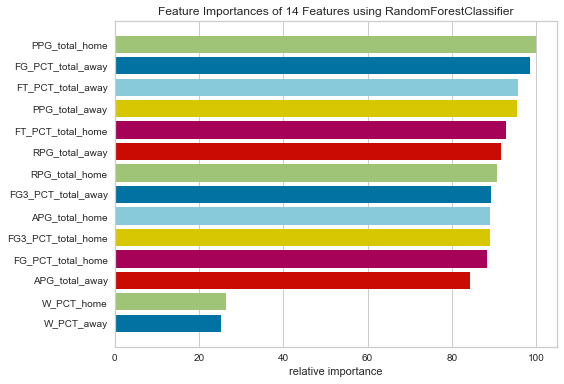

---------------------------------------------
Mean accuracy: 0.599197247706422
Max accuracy: 0.6100917431192661
Min accuracy: 0.5825688073394495
i=20
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 358, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.88      0.74       385
           1       0.67      0.34      0.45       282

    accuracy                           0.65       667
   macro avg       0.66      0.61      0.60       667
weighted avg       0.66      0.65      0.62       667



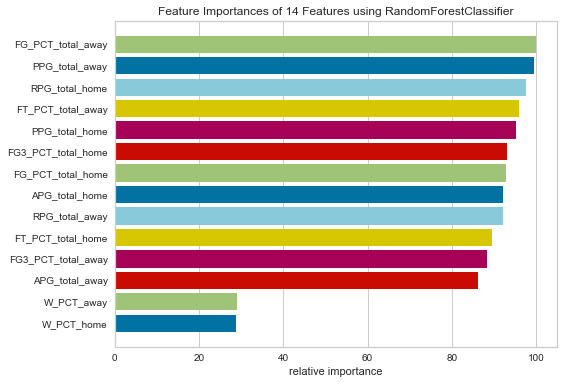

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 524, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.86      0.75       396
           1       0.64      0.37      0.47       271

    accuracy                           0.66       667
   macro avg       0.65      0.61      0.61       667
weighted avg       0.65      0.66      0.63       667



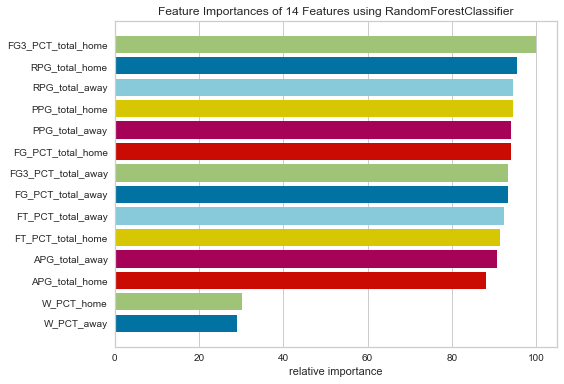

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 366, 'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.71      0.88      0.78       412
           1       0.68      0.40      0.50       254

    accuracy                           0.70       666
   macro avg       0.69      0.64      0.64       666
weighted avg       0.70      0.70      0.68       666



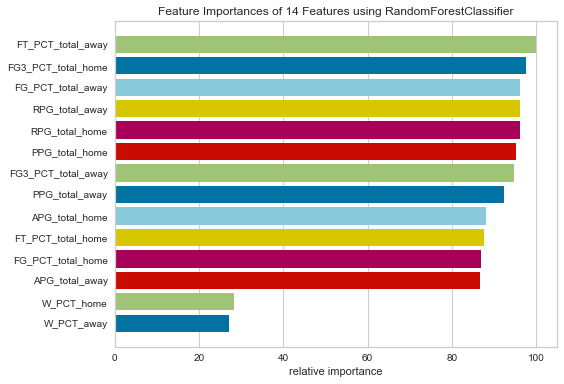

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 498, 'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.69      0.86      0.77       413
           1       0.62      0.37      0.47       253

    accuracy                           0.68       666
   macro avg       0.66      0.62      0.62       666
weighted avg       0.67      0.68      0.65       666



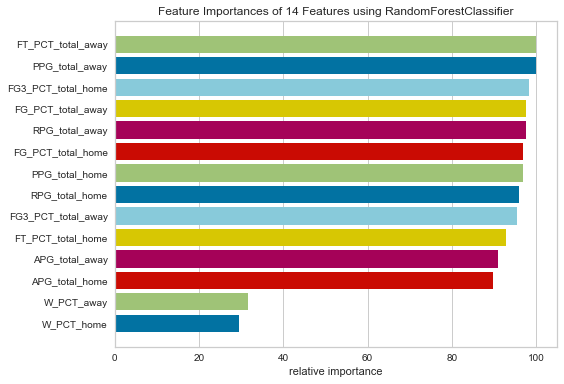

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 760, 'criterion': 'gini'}): 0.69
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       398
           1       0.68      0.44      0.54       268

    accuracy                           0.69       666
   macro avg       0.69      0.65      0.65       666
weighted avg       0.69      0.69      0.68       666



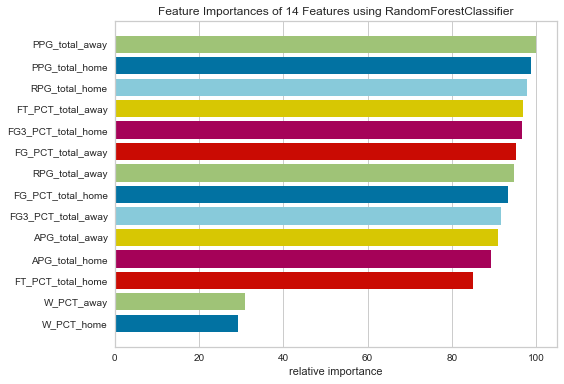

---------------------------------------------
Mean accuracy: 0.6710552381466925
Max accuracy: 0.6996996996996997
Min accuracy: 0.6506746626686657
i=25
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 626, 'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       325
           1       0.70      0.46      0.56       241

    accuracy                           0.69       566
   macro avg       0.69      0.66      0.66       566
weighted avg       0.69      0.69      0.67       566



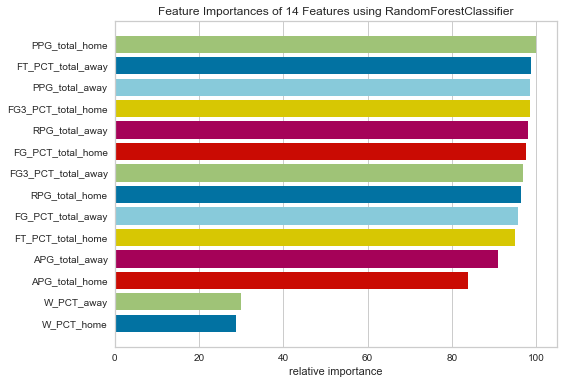

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 302, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.65      0.83      0.73       330
           1       0.61      0.36      0.46       236

    accuracy                           0.64       566
   macro avg       0.63      0.60      0.59       566
weighted avg       0.63      0.64      0.61       566



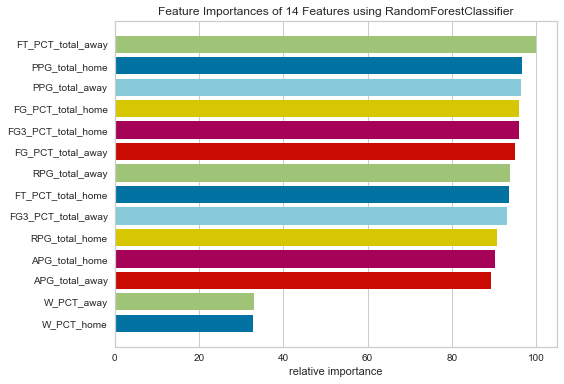

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 770, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       342
           1       0.60      0.46      0.52       224

    accuracy                           0.67       566
   macro avg       0.65      0.63      0.63       566
weighted avg       0.66      0.67      0.66       566



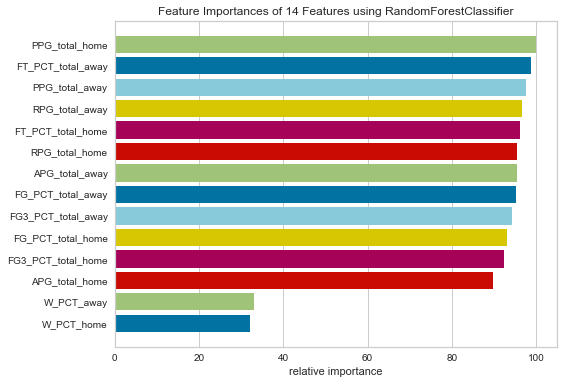

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 696, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       301
           1       0.65      0.42      0.51       265

    accuracy                           0.62       566
   macro avg       0.63      0.61      0.60       566
weighted avg       0.63      0.62      0.60       566



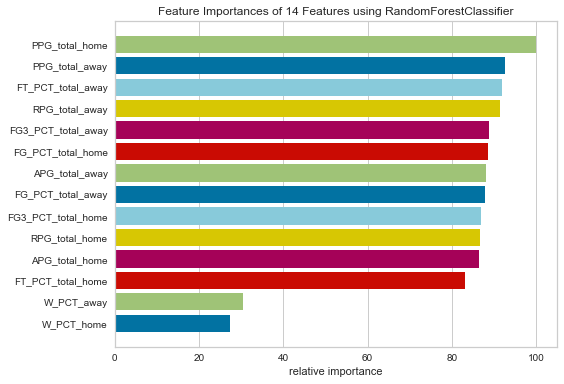

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 418, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.64      0.78      0.71       326
           1       0.58      0.41      0.48       240

    accuracy                           0.63       566
   macro avg       0.61      0.60      0.59       566
weighted avg       0.62      0.63      0.61       566



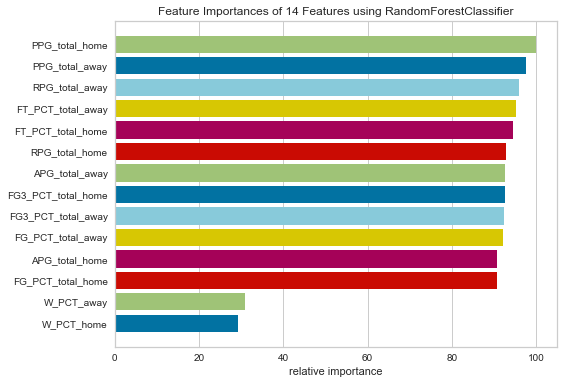

---------------------------------------------
Mean accuracy: 0.6528268551236749
Max accuracy: 0.6872791519434629
Min accuracy: 0.6201413427561837


In [29]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_leaf_nodes': [*range(4,1000,2)],
    'criterion': ['gini', 'entropy'],
})

## Try prune max features

i=0
WINNER:

Best Random Forest accuracy ({'max_features': 'log2', 'criterion': 'gini'}): 0.72
              precision    recall  f1-score   support

           0       0.71      0.95      0.82       639
           1       0.77      0.29      0.42       342

    accuracy                           0.72       981
   macro avg       0.74      0.62      0.62       981
weighted avg       0.73      0.72      0.68       981



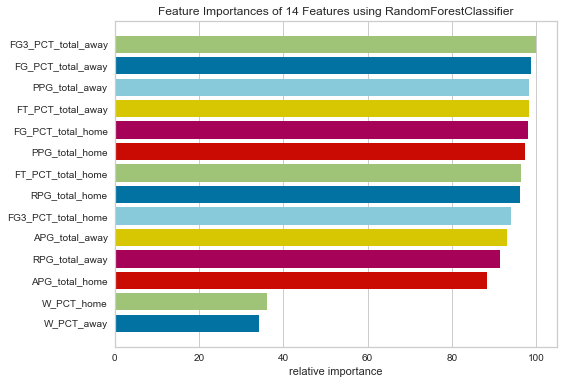

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'max_features': 9, 'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       646
           1       0.65      0.34      0.45       335

    accuracy                           0.71       981
   macro avg       0.69      0.62      0.63       981
weighted avg       0.70      0.71      0.68       981



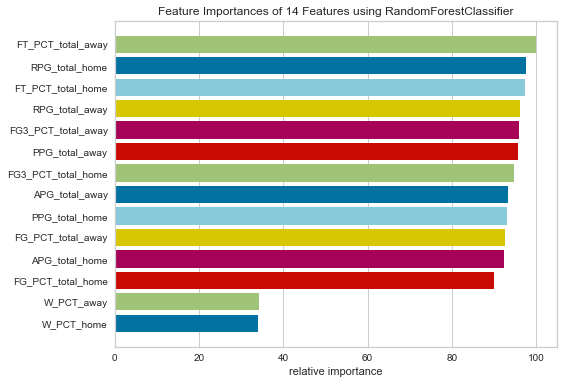

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'max_features': 4, 'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.69      0.91      0.78       612
           1       0.68      0.30      0.42       368

    accuracy                           0.68       980
   macro avg       0.68      0.61      0.60       980
weighted avg       0.68      0.68      0.65       980



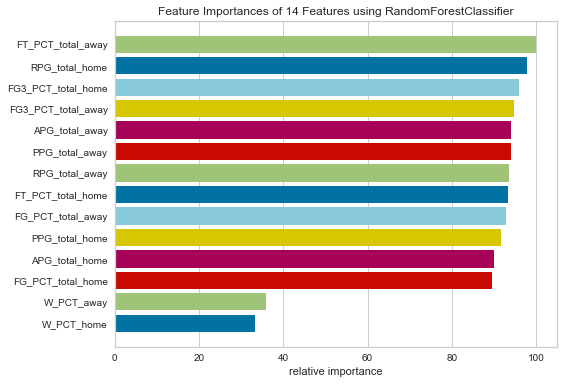

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'max_features': 8, 'criterion': 'gini'}): 0.73
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       646
           1       0.71      0.34      0.46       334

    accuracy                           0.73       980
   macro avg       0.72      0.64      0.64       980
weighted avg       0.72      0.73      0.70       980



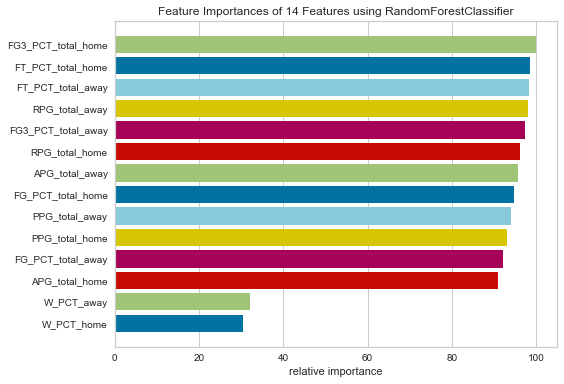

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'max_features': 6, 'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       615
           1       0.68      0.27      0.39       365

    accuracy                           0.68       980
   macro avg       0.68      0.60      0.59       980
weighted avg       0.68      0.68      0.64       980



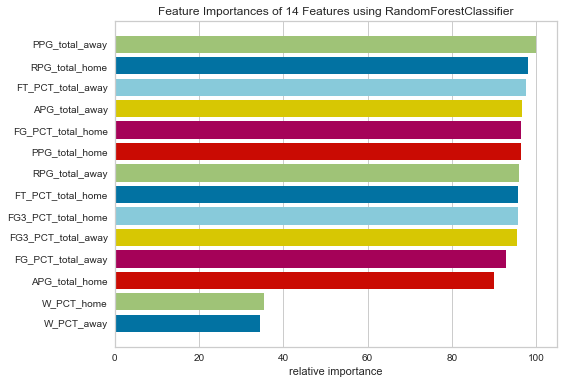

---------------------------------------------
Mean accuracy: 0.7108591295845555
Max accuracy: 0.7275510204081632
Min accuracy: 0.6836734693877551
i=5
FGP:

Best Random Forest accuracy ({'max_features': 5, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.89      0.76       422
           1       0.67      0.33      0.45       281

    accuracy                           0.67       703
   macro avg       0.67      0.61      0.60       703
weighted avg       0.67      0.67      0.64       703



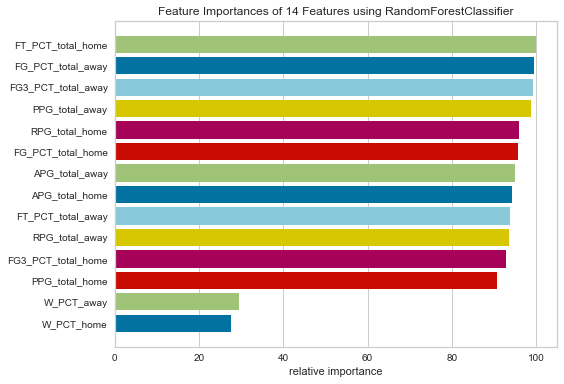

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'max_features': 10, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       431
           1       0.62      0.40      0.49       272

    accuracy                           0.67       703
   macro avg       0.66      0.62      0.63       703
weighted avg       0.66      0.67      0.66       703



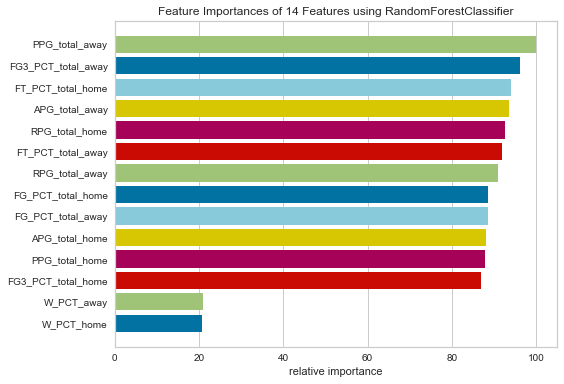

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'max_features': 5, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       424
           1       0.66      0.35      0.45       279

    accuracy                           0.67       703
   macro avg       0.66      0.61      0.61       703
weighted avg       0.67      0.67      0.64       703



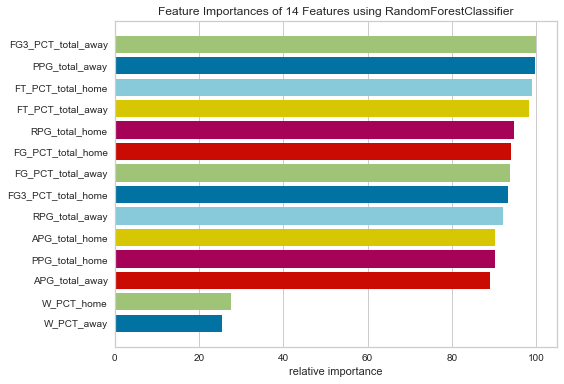

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'max_features': 6, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       443
           1       0.57      0.30      0.40       260

    accuracy                           0.66       703
   macro avg       0.63      0.59      0.58       703
weighted avg       0.64      0.66      0.63       703



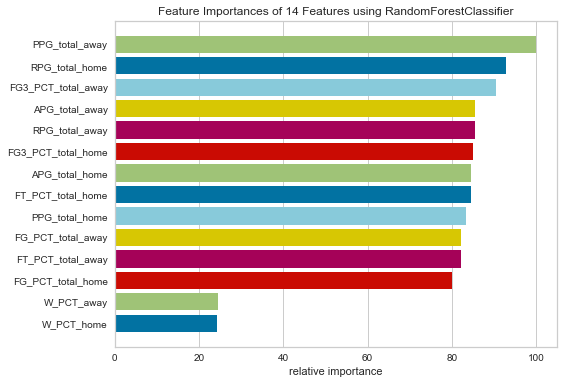

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.68      0.89      0.77       417
           1       0.71      0.40      0.51       285

    accuracy                           0.69       702
   macro avg       0.70      0.64      0.64       702
weighted avg       0.69      0.69      0.67       702



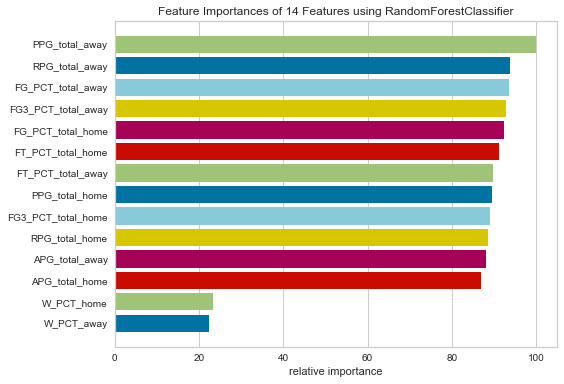

---------------------------------------------
Mean accuracy: 0.6671408250355618
Max accuracy: 0.6742532005689901
Min accuracy: 0.6586059743954481
i=10
FG3:

Best Random Forest accuracy ({'max_features': 7, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       233
           1       0.62      0.56      0.59       215

    accuracy                           0.63       448
   macro avg       0.63      0.62      0.62       448
weighted avg       0.63      0.63      0.63       448



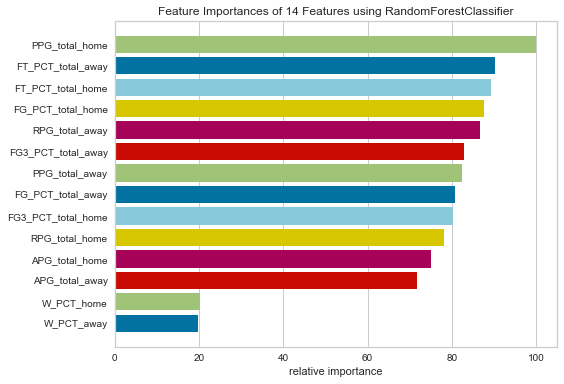

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'max_features': 10, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       239
           1       0.62      0.51      0.56       209

    accuracy                           0.62       448
   macro avg       0.62      0.62      0.62       448
weighted avg       0.62      0.62      0.62       448



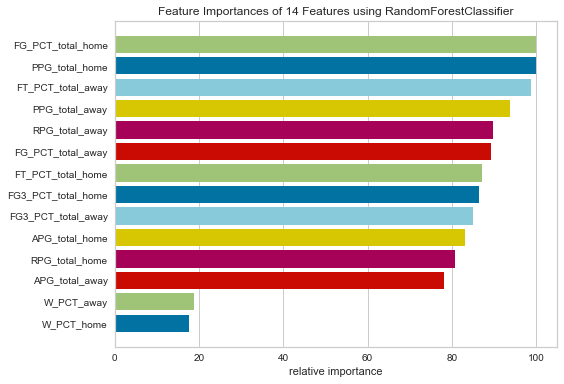

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'max_features': 11, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.58      0.69      0.63       234
           1       0.57      0.45      0.50       213

    accuracy                           0.57       447
   macro avg       0.57      0.57      0.56       447
weighted avg       0.57      0.57      0.57       447



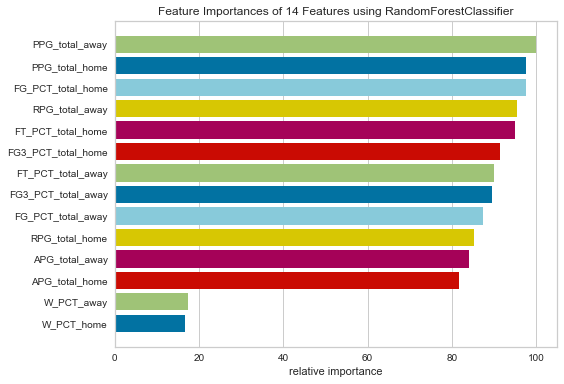

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'max_features': 11, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       230
           1       0.61      0.54      0.57       217

    accuracy                           0.61       447
   macro avg       0.61      0.60      0.60       447
weighted avg       0.61      0.61      0.60       447



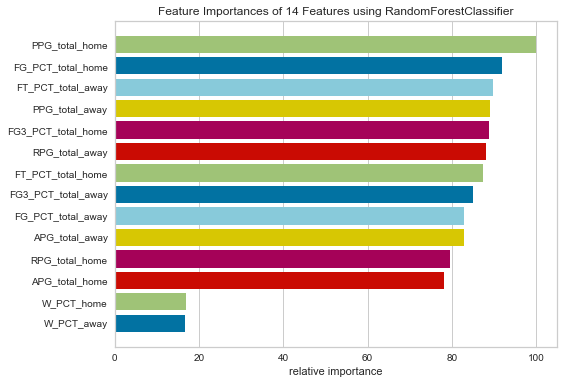

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'max_features': 10, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       228
           1       0.62      0.50      0.56       219

    accuracy                           0.61       447
   macro avg       0.61      0.60      0.60       447
weighted avg       0.61      0.61      0.60       447



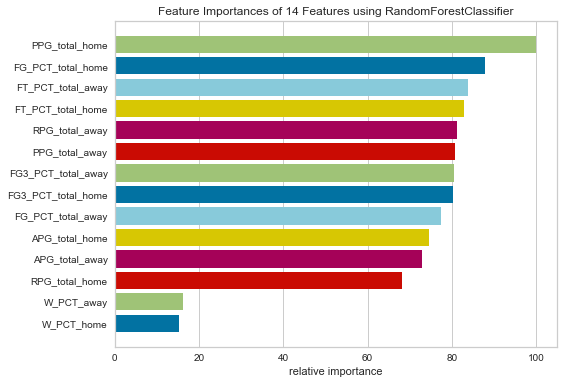

---------------------------------------------
Mean accuracy: 0.6078007650207734
Max accuracy: 0.6272321428571429
Min accuracy: 0.5727069351230425
i=15
FT:

Best Random Forest accuracy ({'max_features': None, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       215
           1       0.61      0.63      0.62       221

    accuracy                           0.61       436
   macro avg       0.61      0.61      0.61       436
weighted avg       0.61      0.61      0.61       436



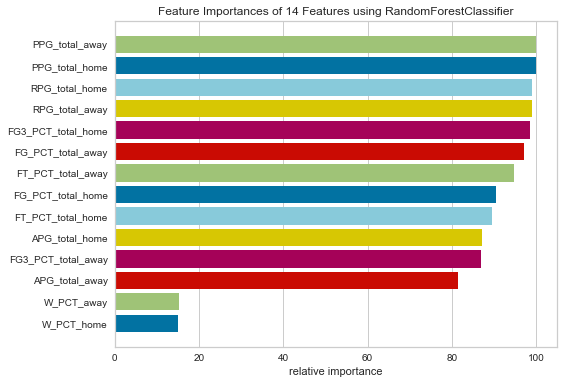

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'max_features': 'sqrt', 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.56      0.58       216
           1       0.59      0.62      0.60       220

    accuracy                           0.59       436
   macro avg       0.59      0.59      0.59       436
weighted avg       0.59      0.59      0.59       436



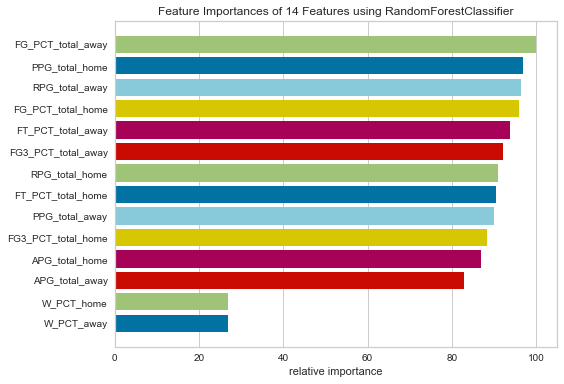

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'max_features': 8, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.56      0.55      0.55       209
           1       0.59      0.60      0.60       227

    accuracy                           0.58       436
   macro avg       0.57      0.57      0.57       436
weighted avg       0.58      0.58      0.58       436



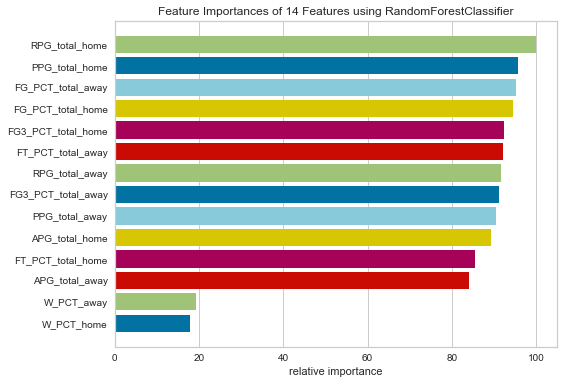

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'max_features': 9, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       208
           1       0.64      0.64      0.64       228

    accuracy                           0.63       436
   macro avg       0.63      0.63      0.63       436
weighted avg       0.63      0.63      0.63       436



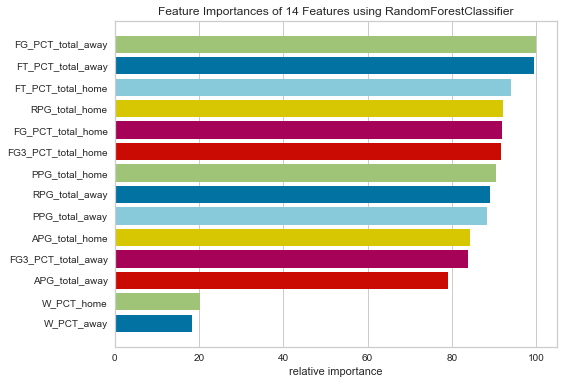

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'max_features': 2, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.60      0.61       217
           1       0.61      0.62      0.62       219

    accuracy                           0.61       436
   macro avg       0.61      0.61      0.61       436
weighted avg       0.61      0.61      0.61       436



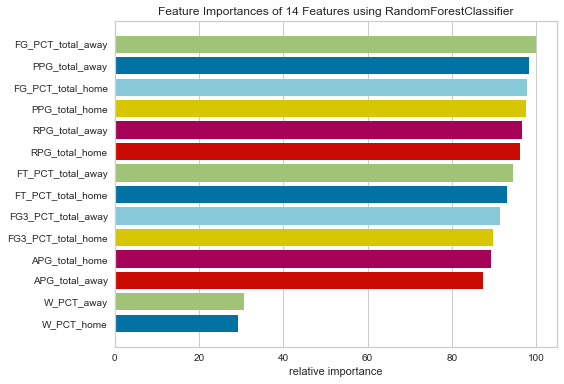

---------------------------------------------
Mean accuracy: 0.6009174311926606
Max accuracy: 0.6261467889908257
Min accuracy: 0.5756880733944955
i=20
AST:

Best Random Forest accuracy ({'max_features': 7, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       385
           1       0.72      0.38      0.49       282

    accuracy                           0.67       667
   macro avg       0.69      0.63      0.63       667
weighted avg       0.68      0.67      0.65       667



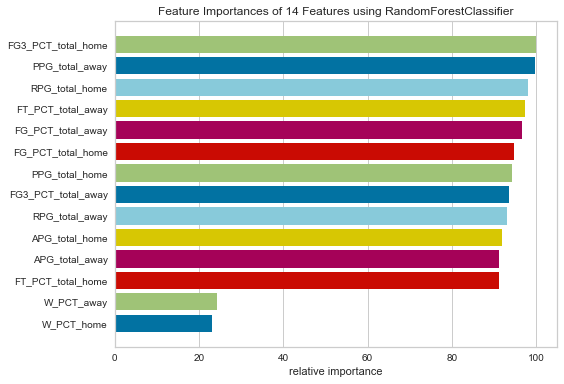

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       396
           1       0.64      0.38      0.48       271

    accuracy                           0.66       667
   macro avg       0.65      0.62      0.61       667
weighted avg       0.65      0.66      0.64       667



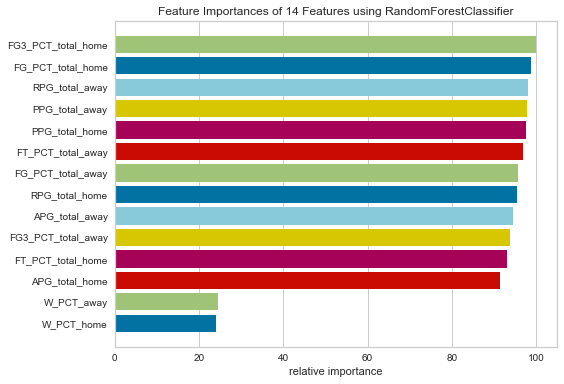

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'max_features': 9, 'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       412
           1       0.68      0.44      0.53       254

    accuracy                           0.71       666
   macro avg       0.70      0.65      0.66       666
weighted avg       0.70      0.71      0.69       666



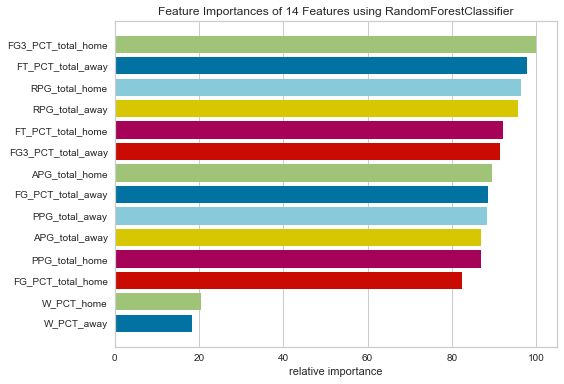

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'max_features': 7, 'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.71      0.85      0.78       413
           1       0.65      0.44      0.52       253

    accuracy                           0.70       666
   macro avg       0.68      0.65      0.65       666
weighted avg       0.69      0.70      0.68       666



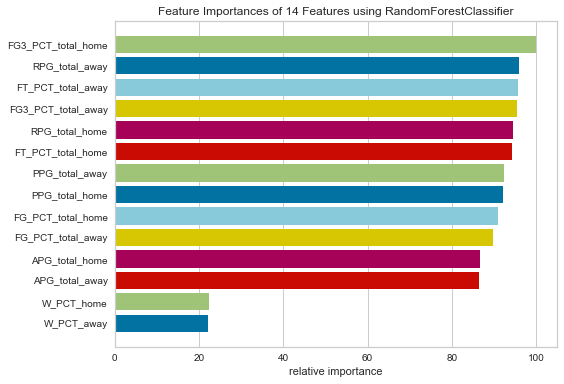

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'max_features': 10, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       398
           1       0.63      0.40      0.49       268

    accuracy                           0.66       666
   macro avg       0.65      0.62      0.62       666
weighted avg       0.66      0.66      0.65       666



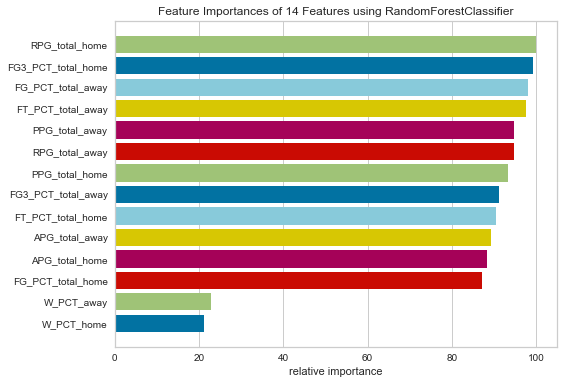

---------------------------------------------
Mean accuracy: 0.6834336210273242
Max accuracy: 0.7057057057057057
Min accuracy: 0.6596701649175413
i=25
REB:

Best Random Forest accuracy ({'max_features': 11, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       325
           1       0.66      0.43      0.52       241

    accuracy                           0.66       566
   macro avg       0.66      0.63      0.63       566
weighted avg       0.66      0.66      0.65       566



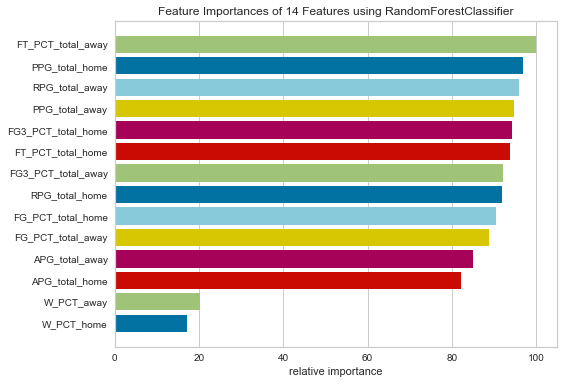

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'max_features': 5, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       330
           1       0.64      0.45      0.53       236

    accuracy                           0.67       566
   macro avg       0.66      0.64      0.64       566
weighted avg       0.66      0.67      0.65       566



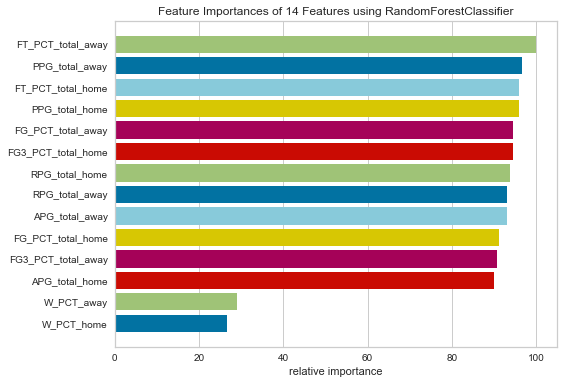

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       342
           1       0.56      0.40      0.47       224

    accuracy                           0.64       566
   macro avg       0.62      0.60      0.60       566
weighted avg       0.63      0.64      0.62       566



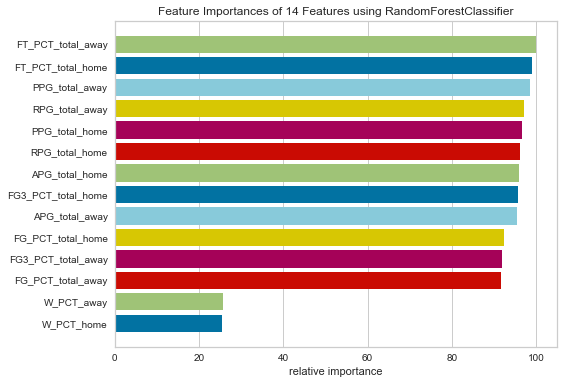

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'max_features': 4, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.82      0.70       301
           1       0.66      0.41      0.50       265

    accuracy                           0.63       566
   macro avg       0.64      0.61      0.60       566
weighted avg       0.63      0.63      0.61       566



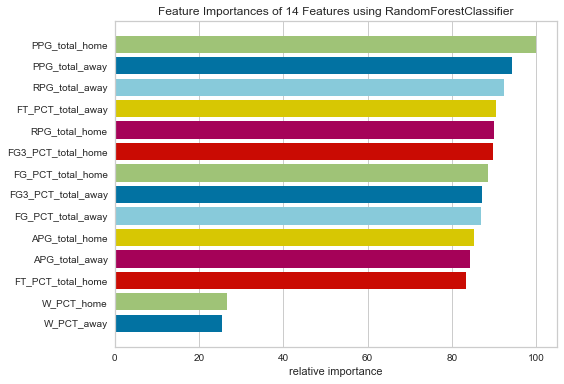

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'max_features': 'sqrt', 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       326
           1       0.63      0.43      0.51       240

    accuracy                           0.65       566
   macro avg       0.64      0.62      0.62       566
weighted avg       0.65      0.65      0.64       566



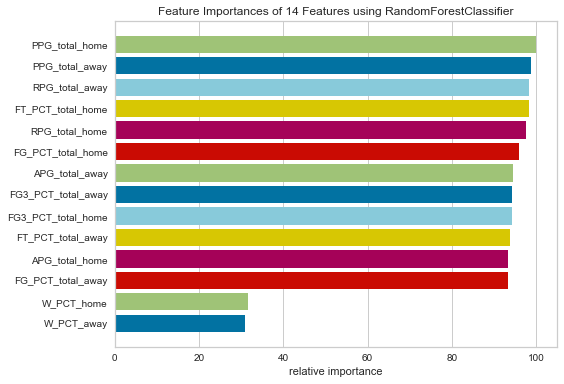

---------------------------------------------
Mean accuracy: 0.6484098939929329
Max accuracy: 0.666077738515901
Min accuracy: 0.6254416961130742


In [30]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
})

## Try class weight balance

i=0


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.72
              precision    recall  f1-score   support

           0       0.71      0.95      0.82       639
           1       0.77      0.29      0.42       342

    accuracy                           0.72       981
   macro avg       0.74      0.62      0.62       981
weighted avg       0.73      0.72      0.68       981



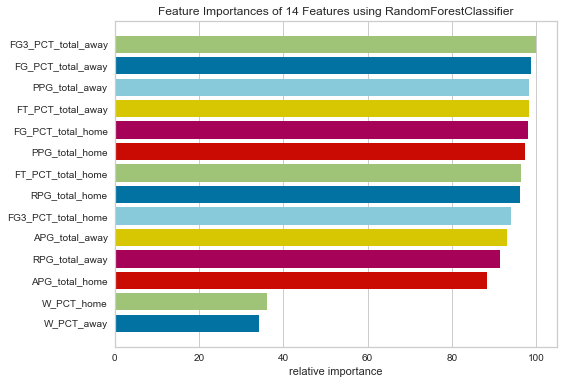

---------------------------------------------
i=1


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.70
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       646
           1       0.67      0.24      0.35       335

    accuracy                           0.70       981
   macro avg       0.69      0.59      0.58       981
weighted avg       0.69      0.70      0.65       981



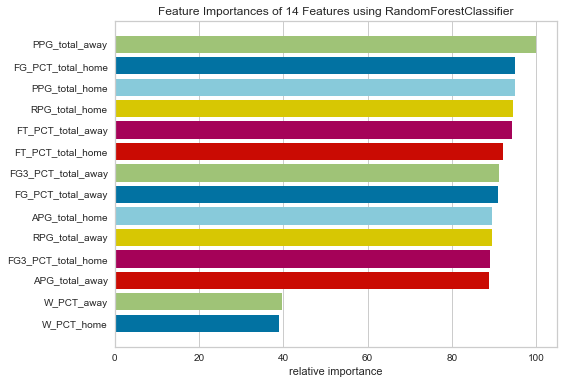

---------------------------------------------
i=2


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.69
              precision    recall  f1-score   support

           0       0.68      0.92      0.79       612
           1       0.69      0.29      0.41       368

    accuracy                           0.69       980
   macro avg       0.69      0.61      0.60       980
weighted avg       0.69      0.69      0.64       980



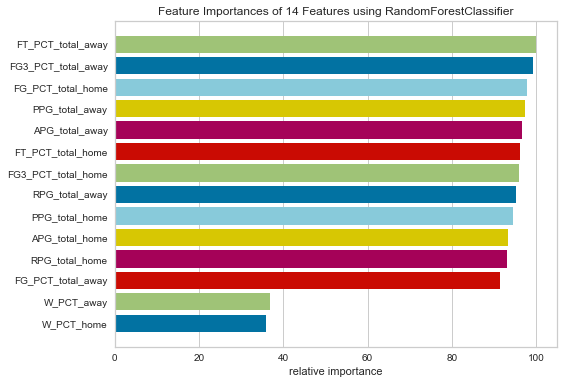

---------------------------------------------
i=3


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.73
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       646
           1       0.74      0.31      0.44       334

    accuracy                           0.73       980
   macro avg       0.73      0.63      0.63       980
weighted avg       0.73      0.73      0.69       980



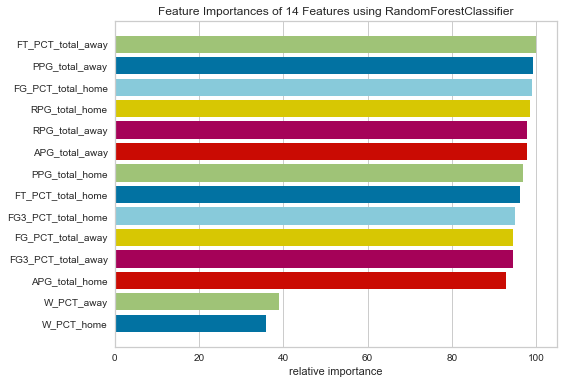

---------------------------------------------
i=4


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.69
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       615
           1       0.70      0.29      0.41       365

    accuracy                           0.69       980
   macro avg       0.70      0.61      0.60       980
weighted avg       0.69      0.69      0.65       980



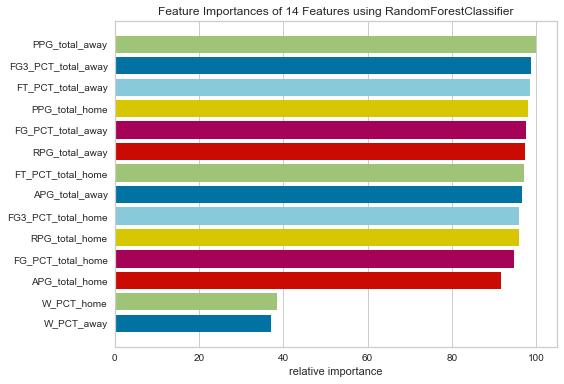

---------------------------------------------
Mean accuracy: 0.7085663317314694
Max accuracy: 0.7285714285714285
Min accuracy: 0.6857142857142857
i=5


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.64
              precision    recall  f1-score   support

           0       0.65      0.90      0.75       422
           1       0.63      0.26      0.37       281

    accuracy                           0.64       703
   macro avg       0.64      0.58      0.56       703
weighted avg       0.64      0.64      0.60       703



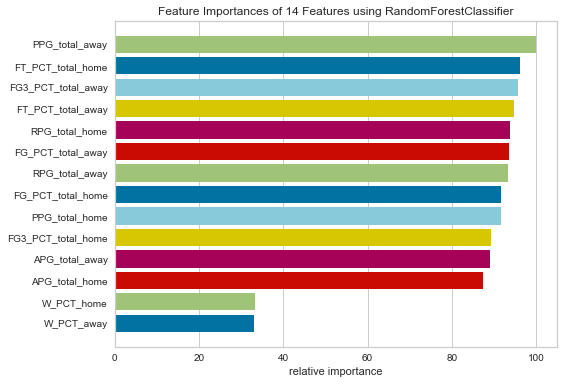

---------------------------------------------
i=6


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       431
           1       0.61      0.37      0.46       272

    accuracy                           0.66       703
   macro avg       0.64      0.61      0.61       703
weighted avg       0.65      0.66      0.64       703



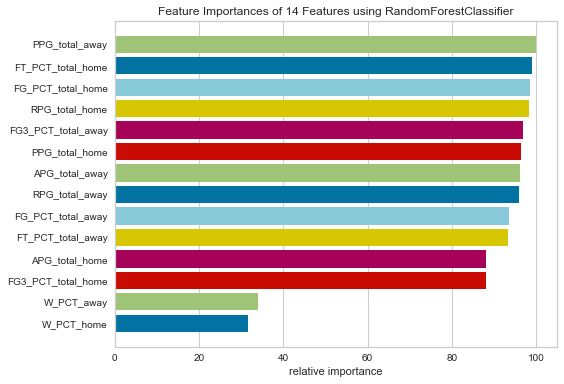

---------------------------------------------
i=7


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.89      0.76       424
           1       0.66      0.33      0.44       279

    accuracy                           0.67       703
   macro avg       0.66      0.61      0.60       703
weighted avg       0.66      0.67      0.63       703



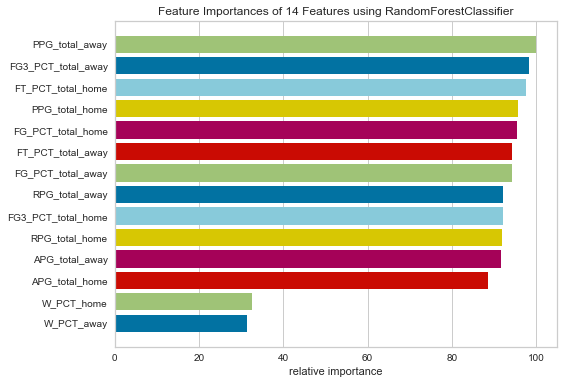

---------------------------------------------
i=8


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.89      0.77       443
           1       0.59      0.26      0.36       260

    accuracy                           0.66       703
   macro avg       0.63      0.58      0.57       703
weighted avg       0.64      0.66      0.62       703



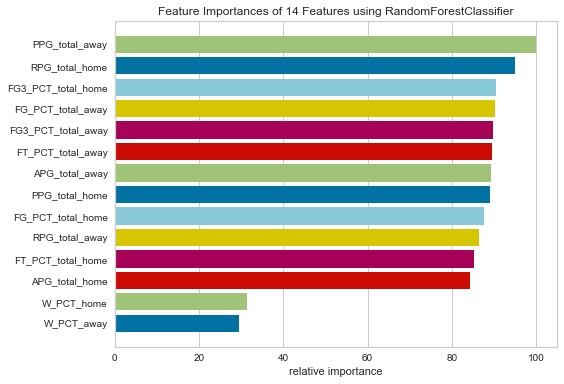

---------------------------------------------
i=9


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       417
           1       0.68      0.32      0.44       285

    accuracy                           0.66       702
   macro avg       0.67      0.61      0.60       702
weighted avg       0.67      0.66      0.63       702



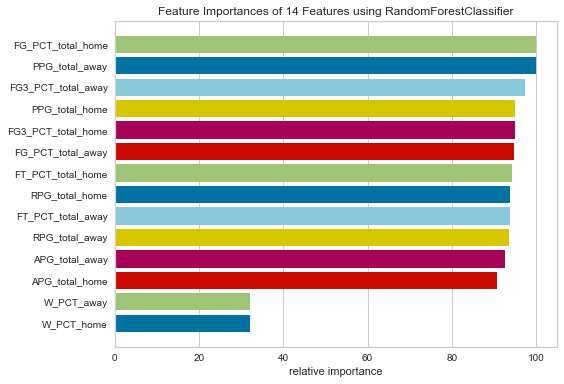

---------------------------------------------
Mean accuracy: 0.6582503556187767
Max accuracy: 0.6657183499288762
Min accuracy: 0.6429587482219061
i=10


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       233
           1       0.59      0.50      0.54       215

    accuracy                           0.60       448
   macro avg       0.60      0.59      0.59       448
weighted avg       0.60      0.60      0.59       448



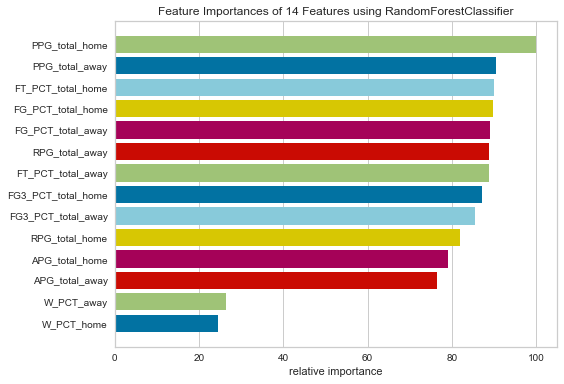

---------------------------------------------
i=11


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.60
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       239
           1       0.59      0.52      0.55       209

    accuracy                           0.60       448
   macro avg       0.60      0.60      0.60       448
weighted avg       0.60      0.60      0.60       448



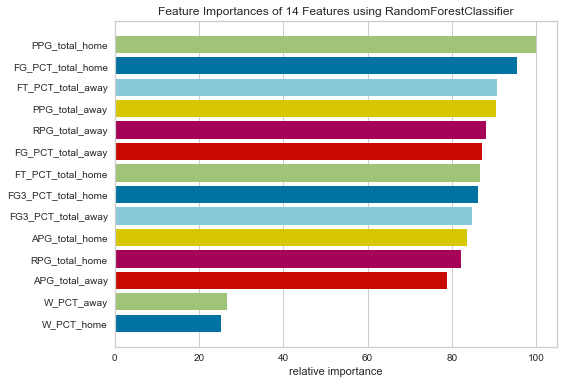

---------------------------------------------
i=12


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.57
              precision    recall  f1-score   support

           0       0.58      0.71      0.64       234
           1       0.57      0.42      0.49       213

    accuracy                           0.57       447
   macro avg       0.57      0.57      0.56       447
weighted avg       0.57      0.57      0.57       447



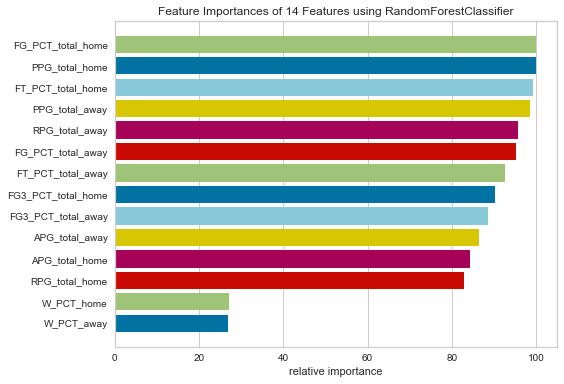

---------------------------------------------
i=13


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.70      0.65       230
           1       0.63      0.54      0.58       217

    accuracy                           0.62       447
   macro avg       0.62      0.62      0.62       447
weighted avg       0.62      0.62      0.62       447



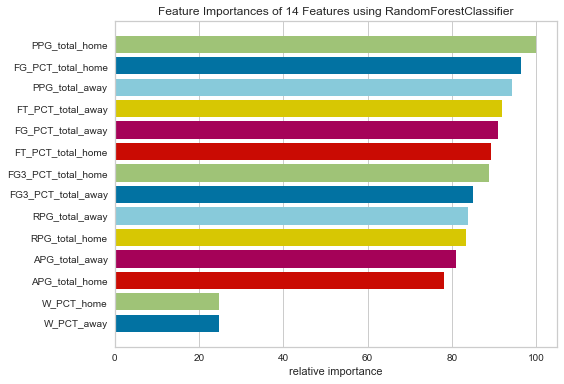

---------------------------------------------
i=14


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.61
              precision    recall  f1-score   support

           0       0.60      0.70      0.64       228
           1       0.62      0.51      0.56       219

    accuracy                           0.61       447
   macro avg       0.61      0.60      0.60       447
weighted avg       0.61      0.61      0.60       447



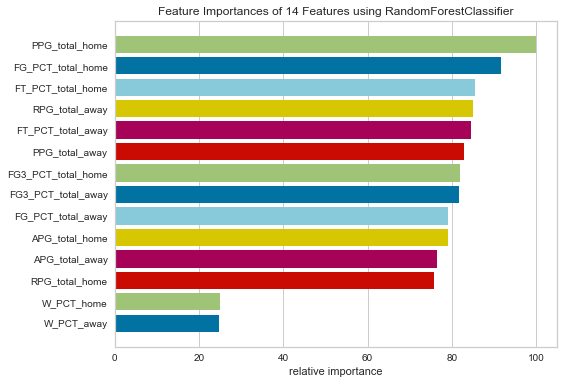

---------------------------------------------
Mean accuracy: 0.5994402165228507
Max accuracy: 0.6219239373601789
Min accuracy: 0.5749440715883669
i=15


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.59      0.59       215
           1       0.61      0.61      0.61       221

    accuracy                           0.60       436
   macro avg       0.60      0.60      0.60       436
weighted avg       0.60      0.60      0.60       436



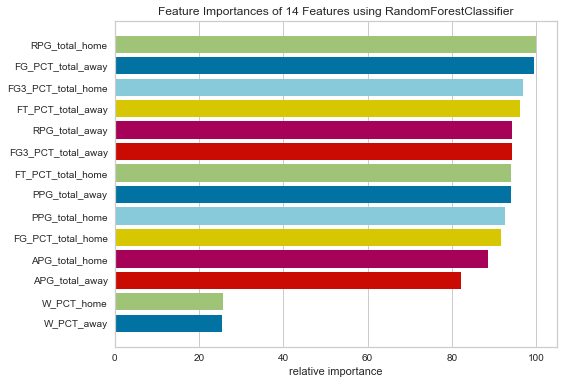

---------------------------------------------
i=16


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       216
           1       0.58      0.63      0.61       220

    accuracy                           0.59       436
   macro avg       0.59      0.59      0.59       436
weighted avg       0.59      0.59      0.59       436



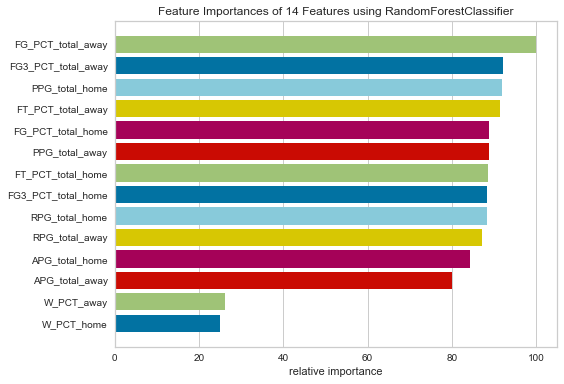

---------------------------------------------
i=17


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.60
              precision    recall  f1-score   support

           0       0.58      0.59      0.59       209
           1       0.62      0.61      0.62       227

    accuracy                           0.60       436
   macro avg       0.60      0.60      0.60       436
weighted avg       0.60      0.60      0.60       436



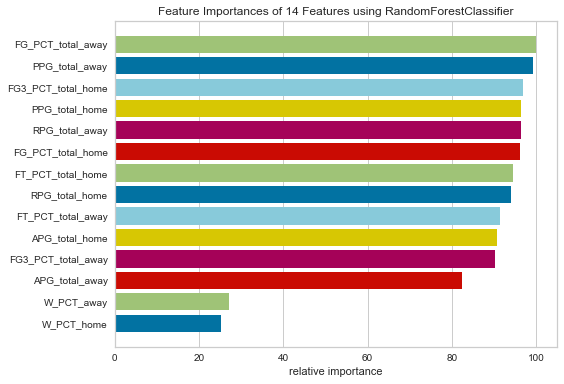

---------------------------------------------
i=18


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.61
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       208
           1       0.63      0.60      0.61       228

    accuracy                           0.61       436
   macro avg       0.61      0.61      0.61       436
weighted avg       0.61      0.61      0.61       436



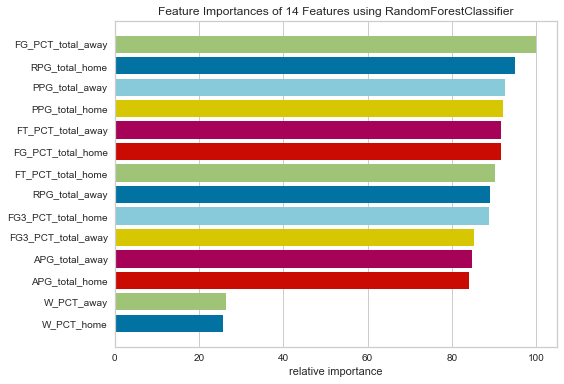

---------------------------------------------
i=19


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.61      0.60       217
           1       0.60      0.59      0.60       219

    accuracy                           0.60       436
   macro avg       0.60      0.60      0.60       436
weighted avg       0.60      0.60      0.60       436



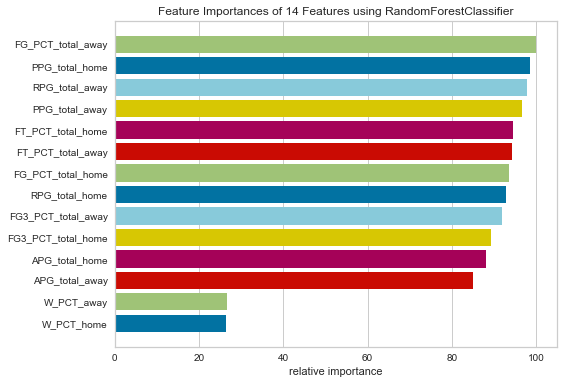

---------------------------------------------
Mean accuracy: 0.599197247706422
Max accuracy: 0.6077981651376146
Min accuracy: 0.5871559633027523
i=20


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.67
              precision    recall  f1-score   support

           0       0.65      0.90      0.76       385
           1       0.72      0.34      0.46       282

    accuracy                           0.67       667
   macro avg       0.69      0.62      0.61       667
weighted avg       0.68      0.67      0.63       667



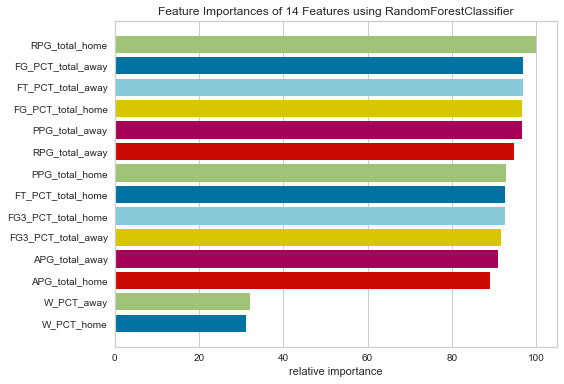

---------------------------------------------
i=21


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       396
           1       0.64      0.38      0.48       271

    accuracy                           0.66       667
   macro avg       0.65      0.62      0.61       667
weighted avg       0.66      0.66      0.64       667



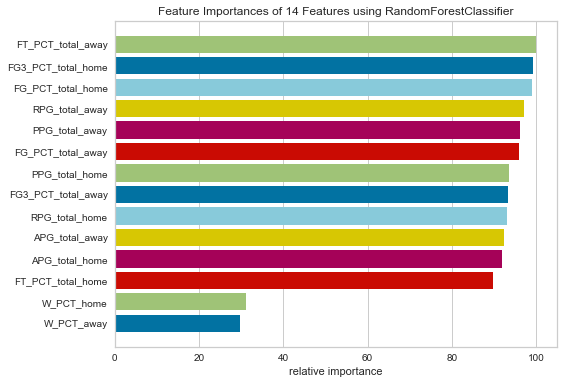

---------------------------------------------
i=22


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       412
           1       0.70      0.41      0.52       254

    accuracy                           0.71       666
   macro avg       0.71      0.65      0.66       666
weighted avg       0.71      0.71      0.69       666



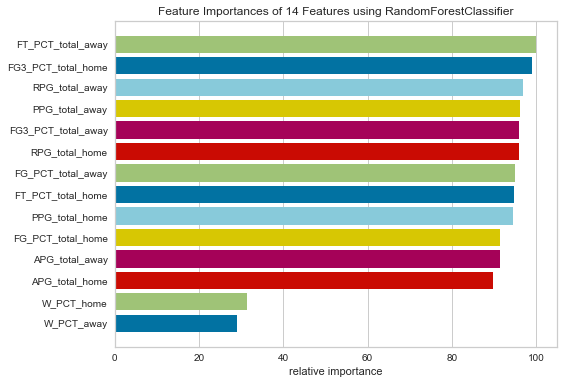

---------------------------------------------
i=23


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.68
              precision    recall  f1-score   support

           0       0.69      0.86      0.77       413
           1       0.62      0.38      0.47       253

    accuracy                           0.68       666
   macro avg       0.66      0.62      0.62       666
weighted avg       0.67      0.68      0.66       666



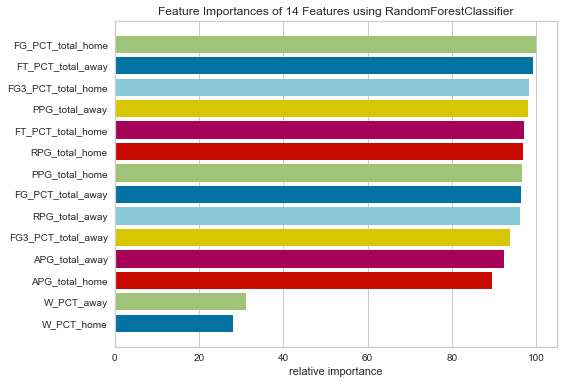

---------------------------------------------
i=24


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.86      0.76       398
           1       0.65      0.38      0.48       268

    accuracy                           0.67       666
   macro avg       0.66      0.62      0.62       666
weighted avg       0.66      0.67      0.64       666



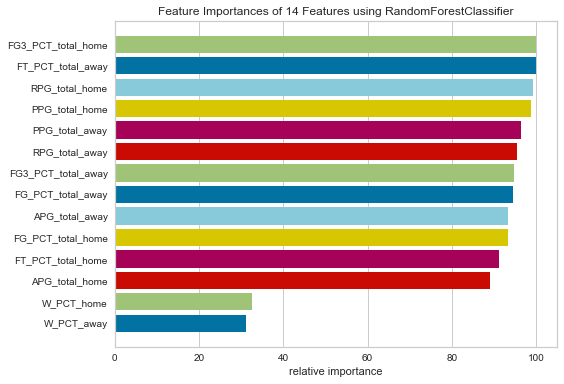

---------------------------------------------
Mean accuracy: 0.6781806168987579
Max accuracy: 0.7087087087087087
Min accuracy: 0.6611694152923538
i=25


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.68
              precision    recall  f1-score   support

           0       0.67      0.86      0.76       325
           1       0.70      0.44      0.54       241

    accuracy                           0.68       566
   macro avg       0.69      0.65      0.65       566
weighted avg       0.68      0.68      0.66       566



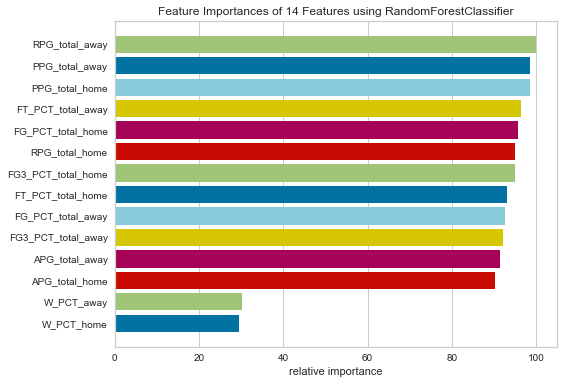

---------------------------------------------
i=26


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.64
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       330
           1       0.60      0.40      0.48       236

    accuracy                           0.64       566
   macro avg       0.63      0.60      0.60       566
weighted avg       0.63      0.64      0.62       566



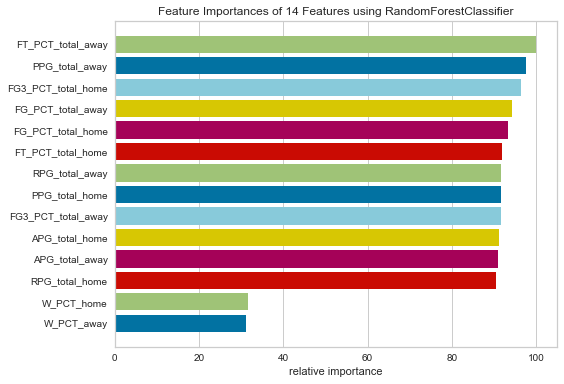

---------------------------------------------
i=27


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.64
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       342
           1       0.58      0.38      0.46       224

    accuracy                           0.64       566
   macro avg       0.62      0.60      0.60       566
weighted avg       0.63      0.64      0.63       566



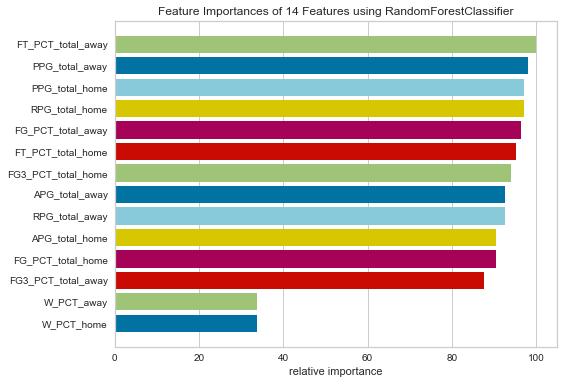

---------------------------------------------
i=28


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.83      0.70       301
           1       0.67      0.39      0.49       265

    accuracy                           0.63       566
   macro avg       0.64      0.61      0.60       566
weighted avg       0.64      0.63      0.60       566



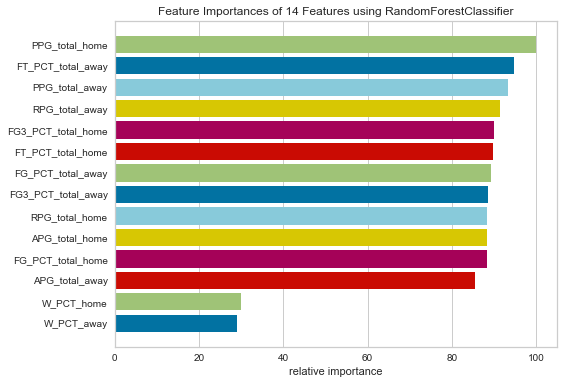

---------------------------------------------
i=29


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.65
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       326
           1       0.63      0.43      0.51       240

    accuracy                           0.65       566
   macro avg       0.64      0.62      0.62       566
weighted avg       0.65      0.65      0.64       566



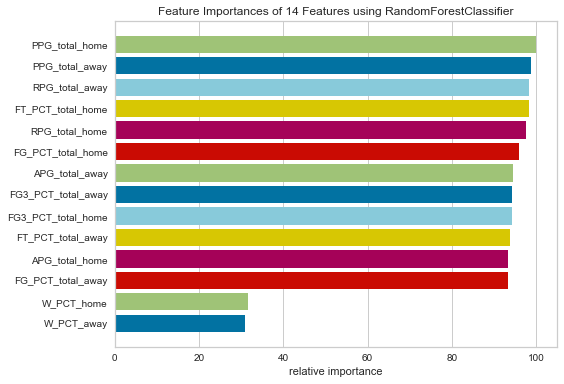

---------------------------------------------
Mean accuracy: 0.6470848056537103
Max accuracy: 0.6802120141342756
Min accuracy: 0.6254416961130742


In [31]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy'],
})